# Goal
Combine the retrained data from JAcob and Rachel together and use this for easier reference

Also, get some general impressions from this data to see where differences in assessment and current distributions in data lay

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pathlib import Path
import os
from os.path import join
import re

In [4]:
## Process and Save ProcessedData

In [5]:
## Open and utilize ProcessedData

## Define paths 
training_folders = glob.glob("../Training/**")
training_folder_JP = "../Training/2024_02_15_Jacob-P_Training"
training_folder_RC = "../Training/2024_02_16_Rachel-C_Training"

# Load 
df_groups = {}
for tf in training_folders:
    csv_list = glob.glob(join(tf,"4 nM 4.csv"))
    df_total = pd.concat( [pd.read_csv(csv) for csv in csv_list] )
    df_groups[Path(tf).stem] = df_total


In [6]:
df_groups["2024_02_15_Jacob-P_Training"]

,Unnamed: 0.1,area,equivalent_diameter,orientation,major_axis_length,minor_axis_length,perimeter,min_intensity,mean_intensity,max_intensity,...,moments_hu-5,moments_hu-6,label,major_axis_length/minor_axis_length,perimeter/major_axis_length,perimeter/minor_axis_length,Labels,Filename,Region,Unnamed: 0
0,0,4.818917e+07,7833.030052,-1.411289,13638.862173,10111.477915,141796.776789,35.0,82.760381,162.0,...,1.391612e-04,-3.479463e-06,1,1.348850,10.396525,14.023348,B,/Users/jacobpietryga/Desktop/Academics/colloid...,1,NaN
1,1,8.005321e+05,1009.588614,-0.123009,1134.041843,918.879419,3512.989446,120.0,190.717153,231.0,...,-3.275177e-08,2.117126e-10,5,1.234157,3.097760,3.823123,C,/Users/jacobpietryga/Desktop/Academics/colloid...,5,NaN
2,2,1.705016e+05,465.928486,-1.313139,494.247944,443.903478,1587.639684,112.0,191.967044,234.0,...,-1.729264e-09,1.755310e-12,6,1.113413,3.212233,3.576543,C,/Users/jacobpietryga/Desktop/Academics/colloid...,6,NaN
3,3,2.546988e+05,569.466938,0.404172,652.905284,510.987657,2010.897322,105.0,171.413995,227.0,...,-7.681345e-08,-4.091292e-10,7,1.277732,3.079922,3.935315,I,/Users/jacobpietryga/Desktop/Academics/colloid...,7,NaN
4,4,1.983332e+05,502.519323,-1.482807,538.154287,472.244161,1683.613227,125.0,192.721558,235.0,...,6.192034e-10,-1.646804e-15,8,1.139568,3.128495,3.565133,C,/Users/jacobpietryga/Desktop/Academics/colloid...,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,43,4.126454e+03,72.484238,-0.115239,110.314785,49.257654,248.167086,92.0,105.255319,120.0,...,2.890213e-05,-7.173829e-10,65,2.239546,2.249627,5.038143,NaN,/Users/jacobpietryga/Desktop/Academics/colloid...,65,NaN
2203,44,1.316953e+03,40.948715,1.189496,59.136541,28.032077,109.224724,103.0,115.866667,127.0,...,3.178614e-06,1.890677e-09,66,2.109603,1.846992,3.896419,NaN,/Users/jacobpietryga/Desktop/Academics/colloid...,66,NaN
2204,45,2.142244e+04,165.154177,-1.547405,236.371860,121.648607,594.581259,118.0,175.987705,212.0,...,-4.148003e-06,2.140023e-08,67,1.943071,2.515449,4.887695,NaN,/Users/jacobpietryga/Desktop/Academics/colloid...,67,NaN
2205,46,6.760361e+04,293.386423,-1.184529,353.769202,262.231530,1096.404251,94.0,163.145455,210.0,...,4.177530e-08,-1.570955e-11,68,1.349072,3.099208,4.181054,NaN,/Users/jacobpietryga/Desktop/Academics/colloid...,68,NaN


In [7]:
df = pd.read_csv(("/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/ProcessedData/Training_Data_20240216/2024_02_16_Rachel-C_Training.csv"))

In [8]:
df.Labels.value_counts()


I     751
C     648
PS    361
MC    348
B      45
V       3
PC      1
O       1
Name: Labels, dtype: int64

array(['/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/4 nM 9.bmp',
       '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/L-2_nM-3_au10_mixing-T_oven-T_embed-SiO2_12.tif',
       '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/4 nM 8.bmp',
       '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 4.bmp',
       '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 5.bmp',
       '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 7.bmp',
       '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 6.bmp',
       '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_20240215/39.5 hold 2.bmp',
       '/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Training_202402

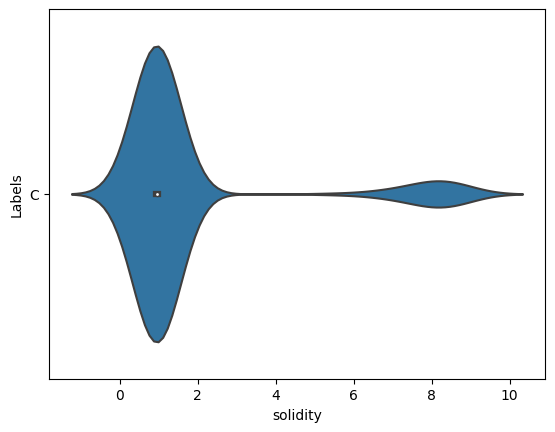

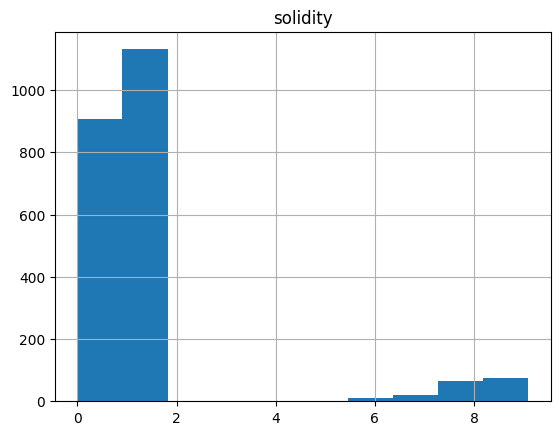

In [9]:
df.solidity.describe()
df.sort_values(by="solidity")
df[df.Labels == "C"].solidity.describe()

sns.violinplot(df[df.Labels == "C"],x="solidity",y="Labels")
df.hist("solidity")
df_solid = df[df.solidity >= 1]
df_solid[df_solid.Labels == "C"].Filename.unique()
df_solid.Filename.unique()

In [10]:
df = df[df.Filename != "../Images/Training/39.5 hold 1.bmp"]
df

,Unnamed: 0.1,area,equivalent_diameter,orientation,major_axis_length,minor_axis_length,perimeter,min_intensity,mean_intensity,max_intensity,...,moments_hu-5,moments_hu-6,label,major_axis_length/minor_axis_length,perimeter/major_axis_length,perimeter/minor_axis_length,Labels,Filename,Region,Unnamed: 0
0,0,4.818917e+07,7833.030052,-1.411289,13638.862170,10111.477910,141796.776800,35,82.760381,162,...,1.391610e-04,-3.480000e-06,1,1.348850,10.396525,14.023348,B,/Users/jacobpietryga/Desktop/Academics/colloid...,1,NaN
1,1,8.005321e+05,1009.588614,-0.123009,1134.041843,918.879419,3512.989446,120,190.717153,231,...,-3.280000e-08,2.120000e-10,5,1.234157,3.097760,3.823123,C,/Users/jacobpietryga/Desktop/Academics/colloid...,5,NaN
2,2,1.705016e+05,465.928486,-1.313139,494.247944,443.903478,1587.639684,112,191.967044,234,...,-1.730000e-09,1.760000e-12,6,1.113413,3.212233,3.576543,C,/Users/jacobpietryga/Desktop/Academics/colloid...,6,NaN
3,3,2.546988e+05,569.466937,0.404172,652.905284,510.987657,2010.897322,105,171.413995,227,...,-7.680000e-08,-4.090000e-10,7,1.277732,3.079922,3.935315,I,/Users/jacobpietryga/Desktop/Academics/colloid...,7,NaN
4,4,1.983332e+05,502.519323,-1.482807,538.154287,472.244161,1683.613227,125,192.721558,235,...,6.190000e-10,-1.650000e-15,8,1.139568,3.128495,3.565133,C,/Users/jacobpietryga/Desktop/Academics/colloid...,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,43,4.126454e+03,72.484238,-0.115239,110.314785,49.257654,248.167087,92,105.255319,120,...,2.890000e-05,-7.170000e-10,65,2.239546,2.249627,5.038143,I,/Users/jacobpietryga/Desktop/Academics/colloid...,65,NaN
2203,44,1.316954e+03,40.948715,1.189496,59.136541,28.032077,109.224724,103,115.866667,127,...,3.180000e-06,1.890000e-09,66,2.109603,1.846992,3.896419,I,/Users/jacobpietryga/Desktop/Academics/colloid...,66,NaN
2204,45,2.142244e+04,165.154178,-1.547405,236.371860,121.648607,594.581259,118,175.987705,212,...,-4.150000e-06,2.140000e-08,67,1.943071,2.515449,4.887695,I,/Users/jacobpietryga/Desktop/Academics/colloid...,67,NaN
2205,46,6.760361e+04,293.386423,-1.184529,353.769202,262.231531,1096.404251,94,163.145454,210,...,4.180000e-08,-1.570000e-11,68,1.349072,3.099208,4.181054,I,/Users/jacobpietryga/Desktop/Academics/colloid...,68,NaN


In [11]:
df_prev = pd.read_csv("/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/ProcessedData/Training_Data_20231106/values_4 nM 10_231103.csv")

df_prev.solidity.describe()

count    59.000000
mean      0.786607
std       0.092767
min       0.594970
25%       0.715997
50%       0.797477
75%       0.857646
max       1.000000
Name: solidity, dtype: float64

/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/936852371.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


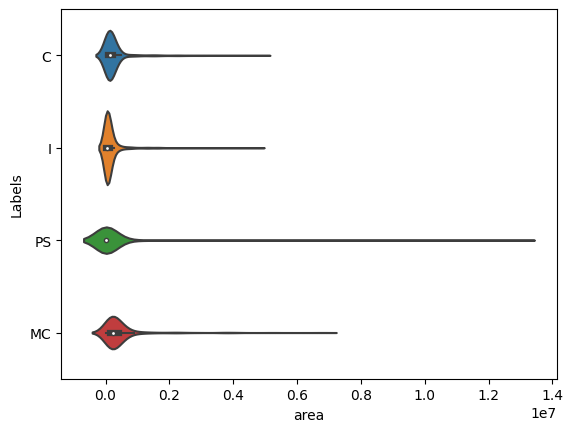

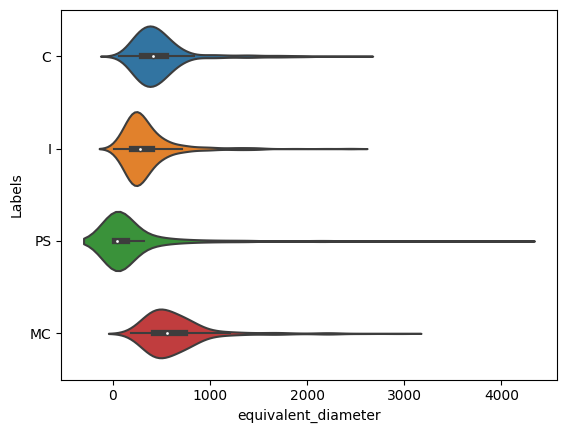

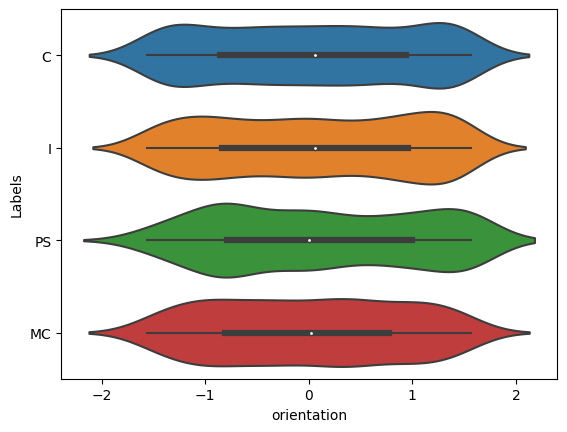

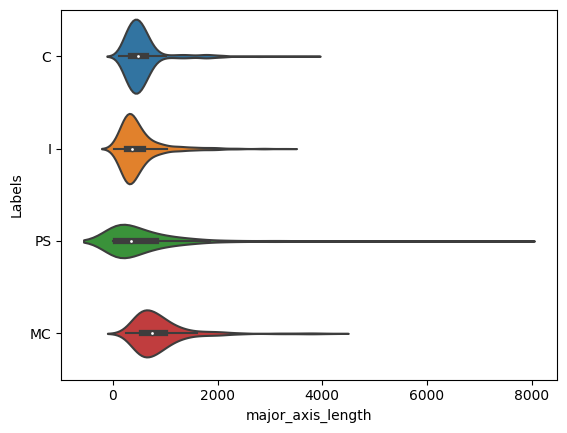

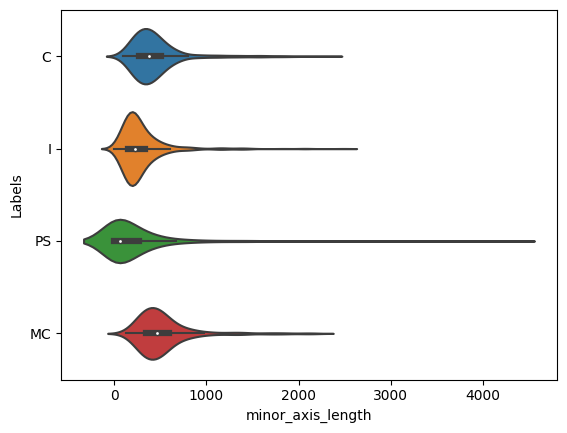

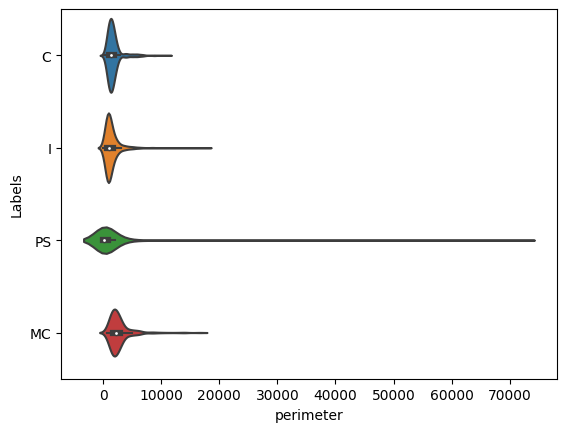

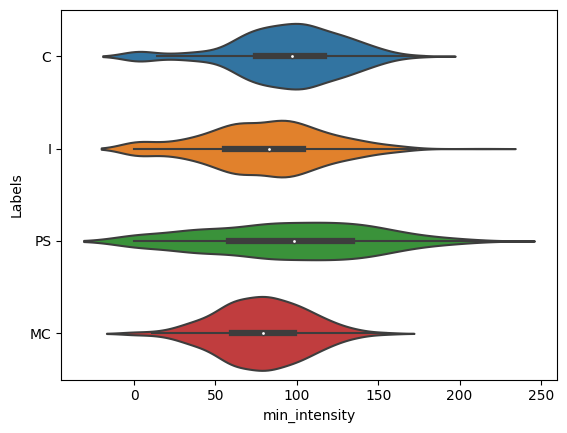

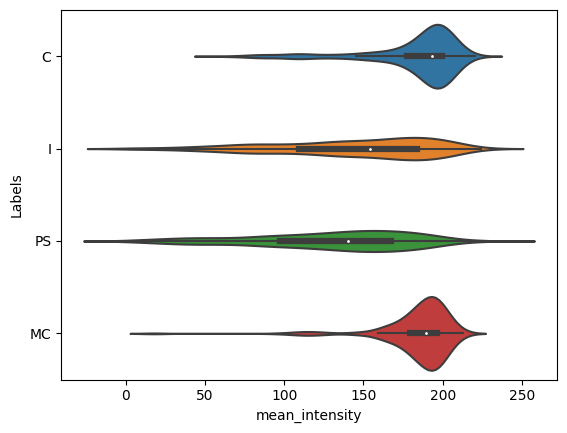

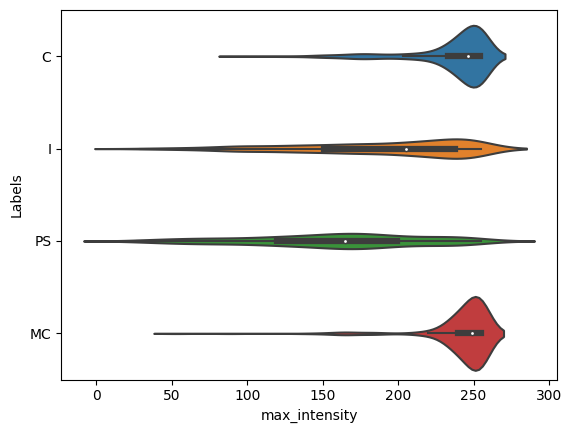

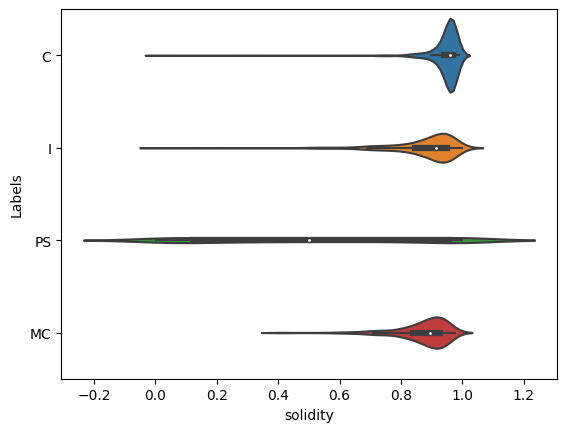

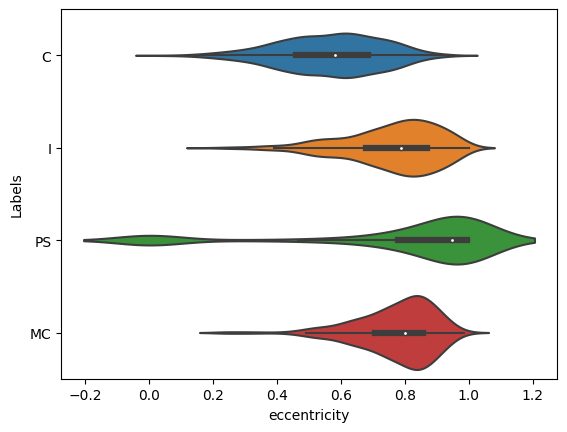

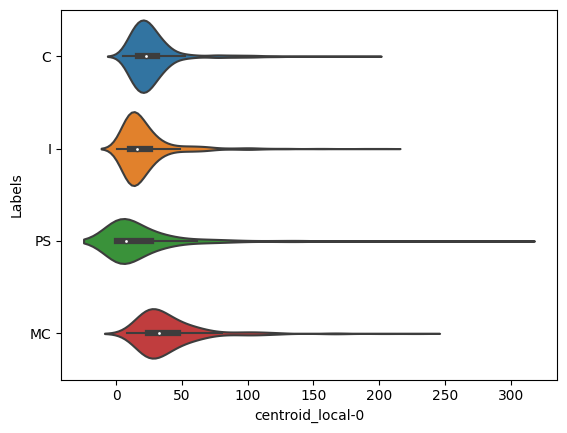

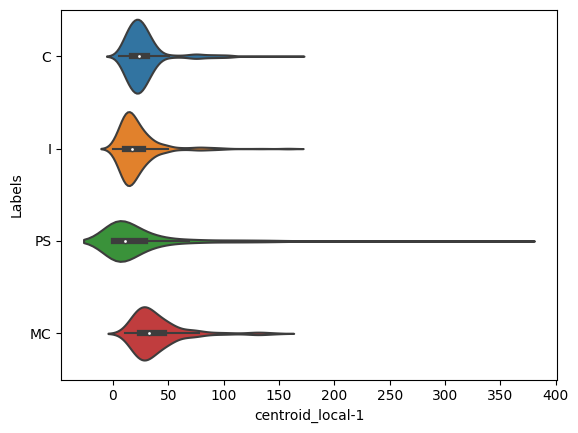

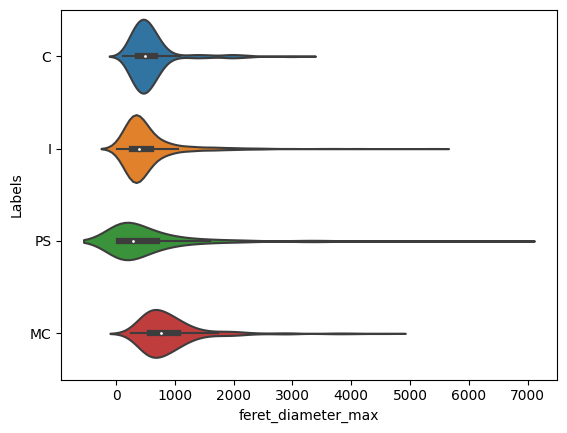

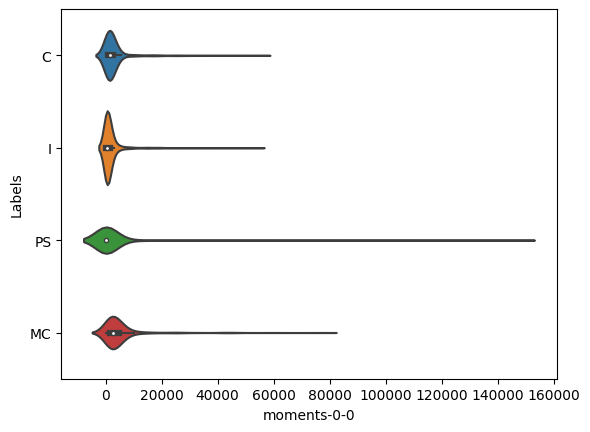

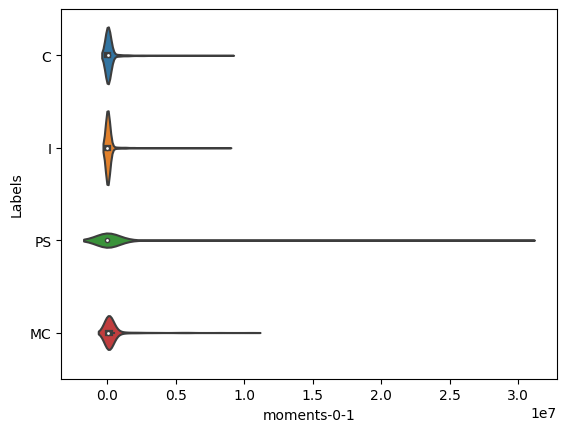

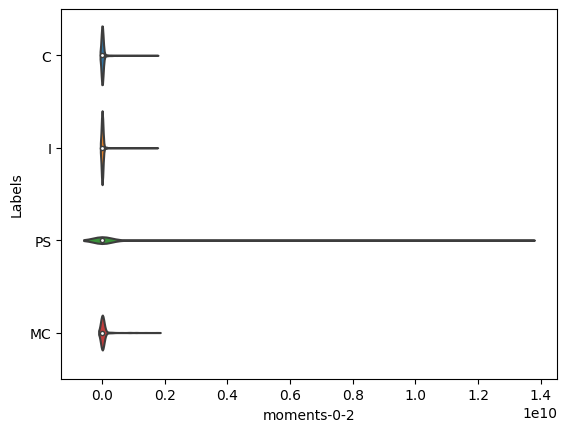

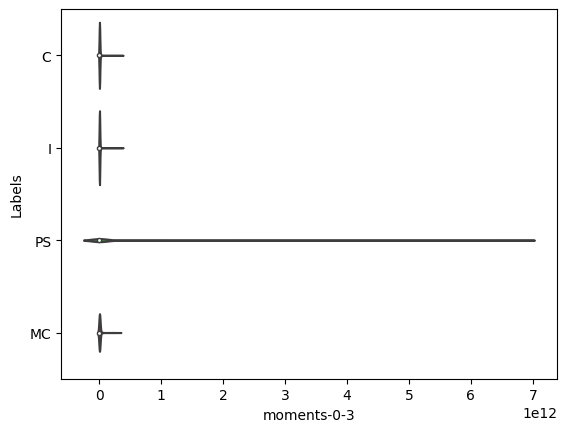

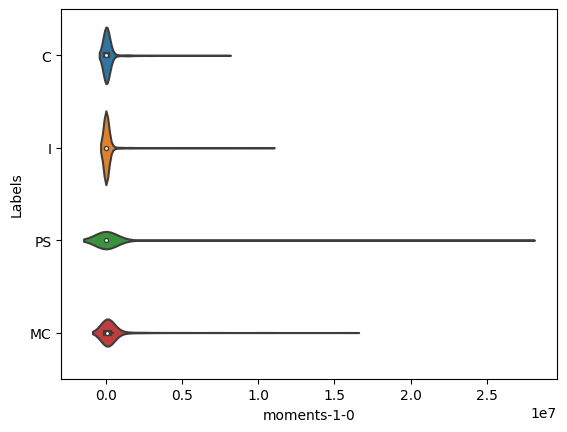

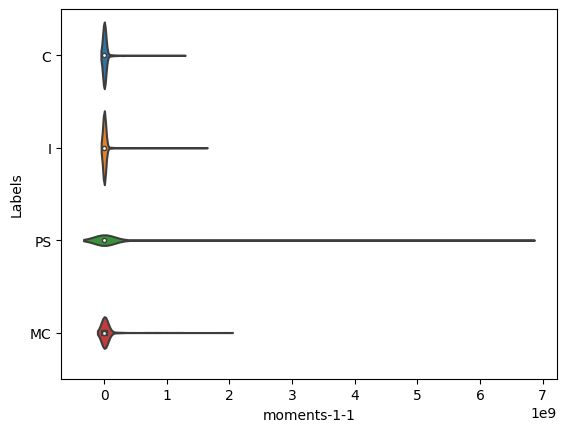

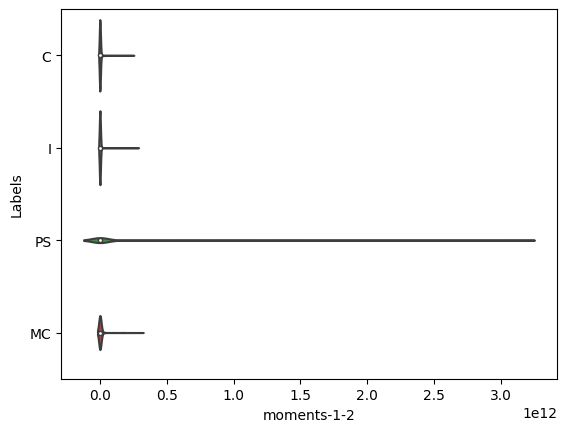

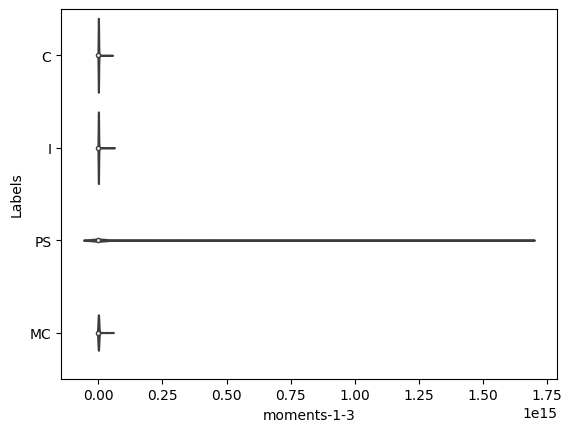

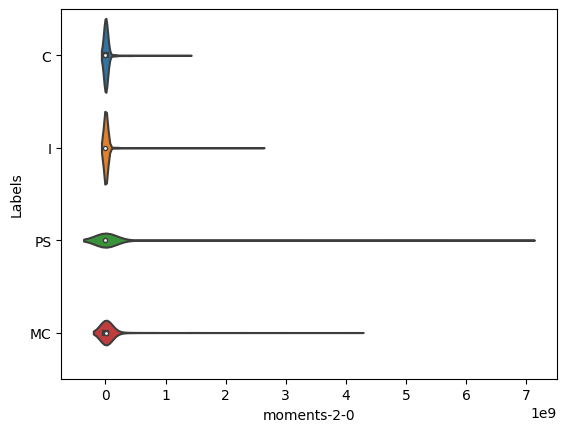

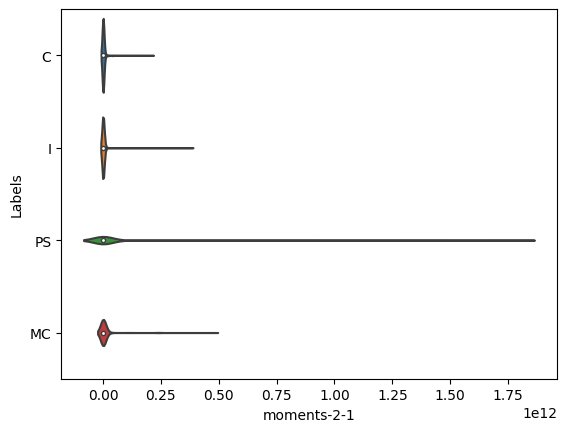

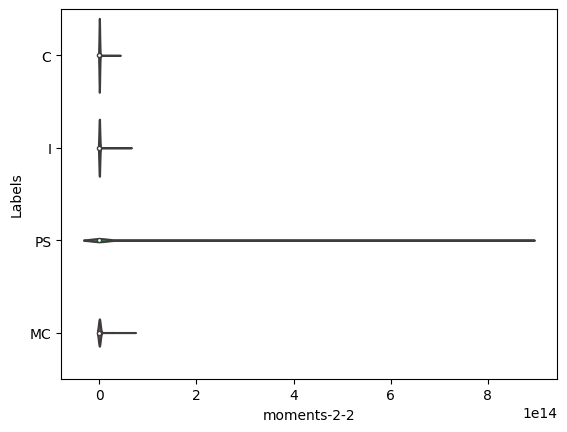

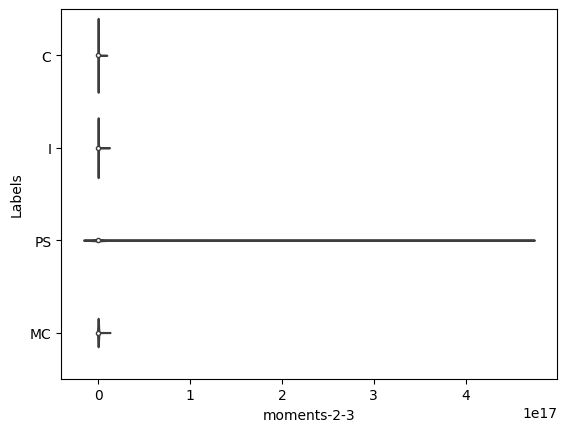

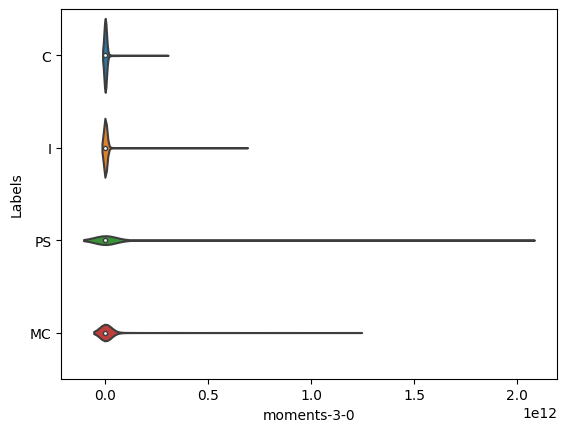

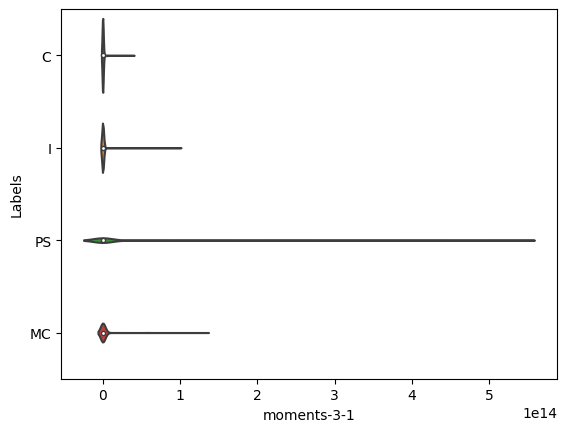

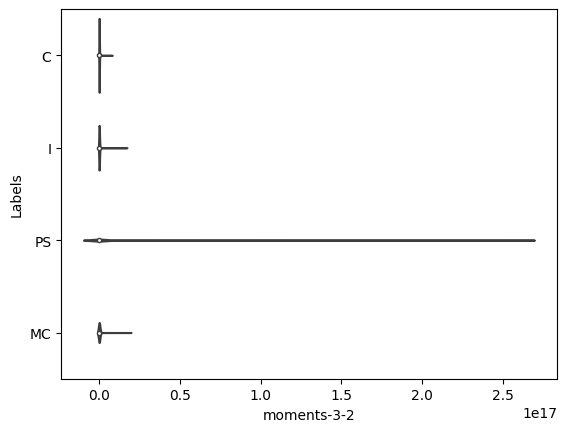

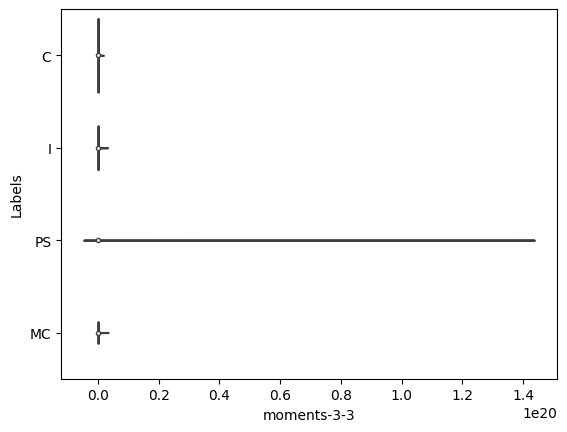

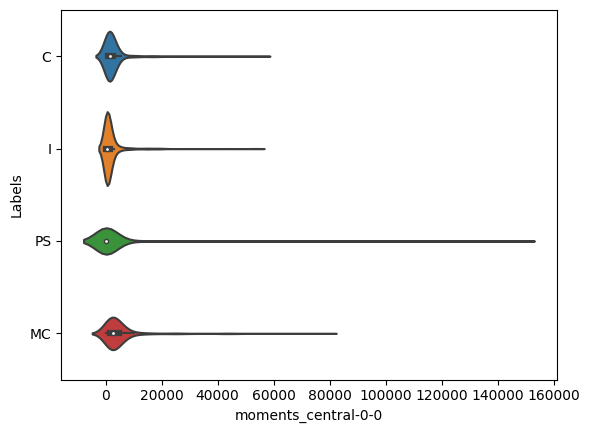

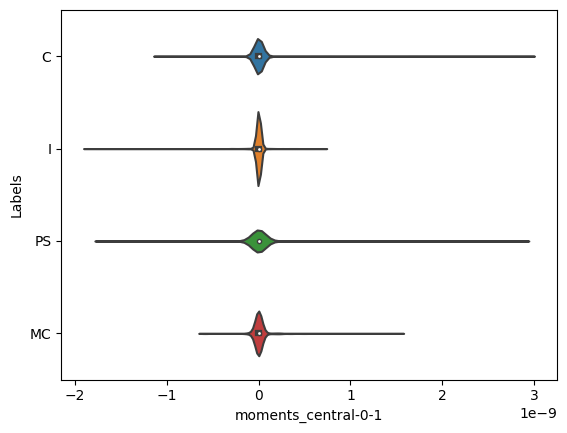

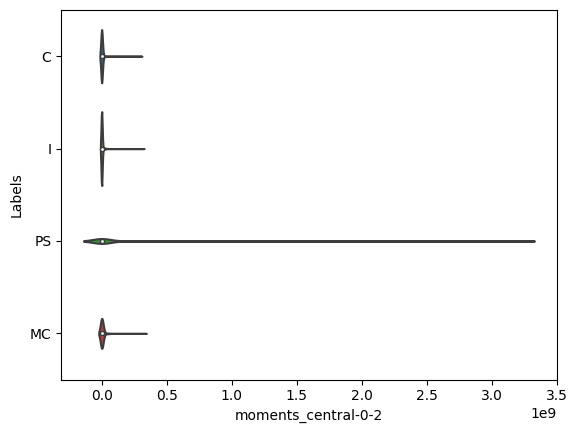

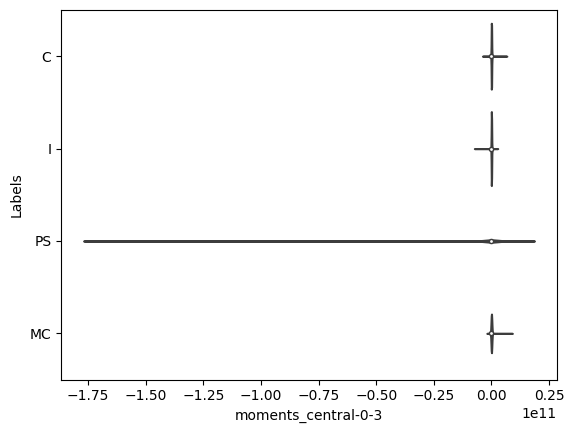

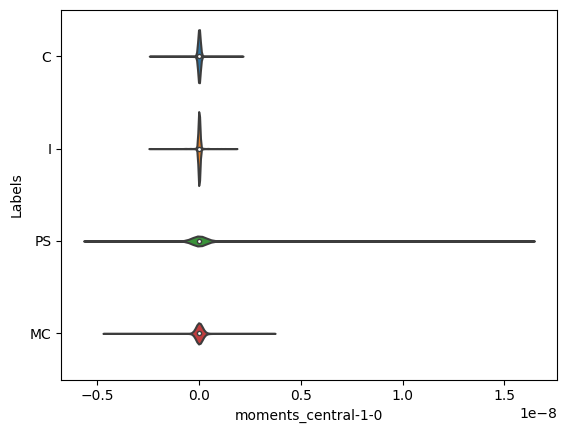

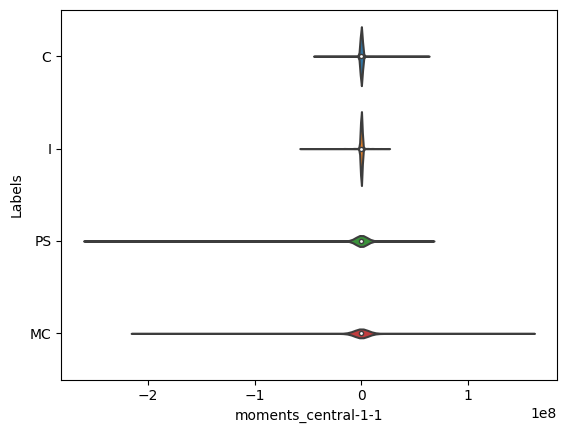

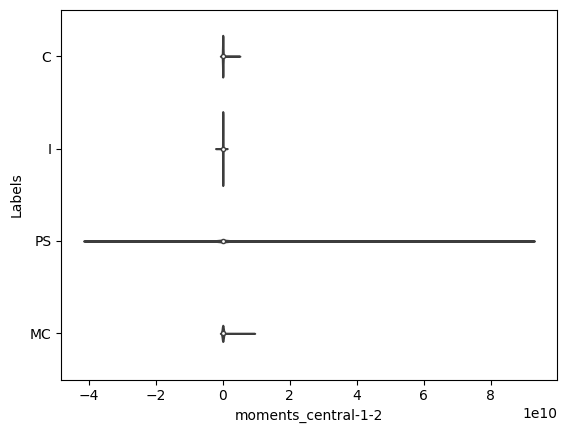

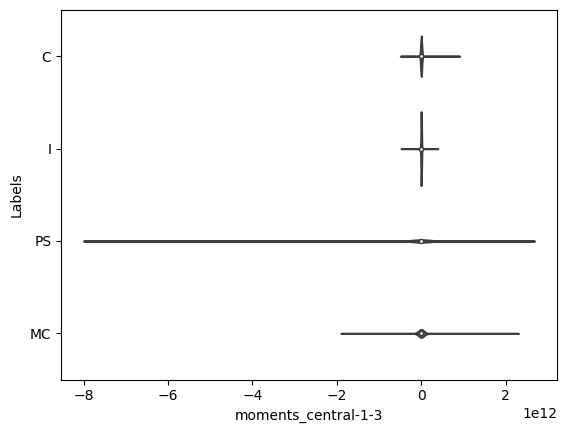

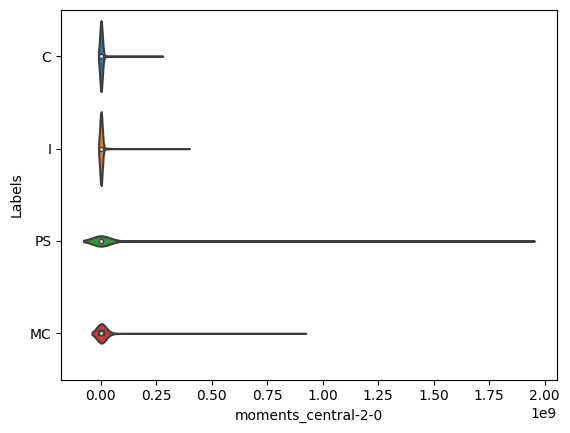

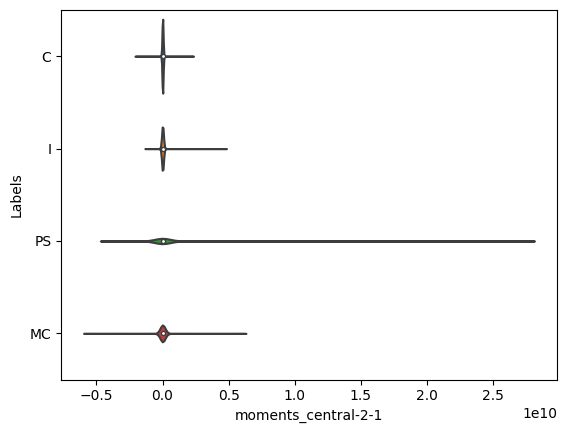

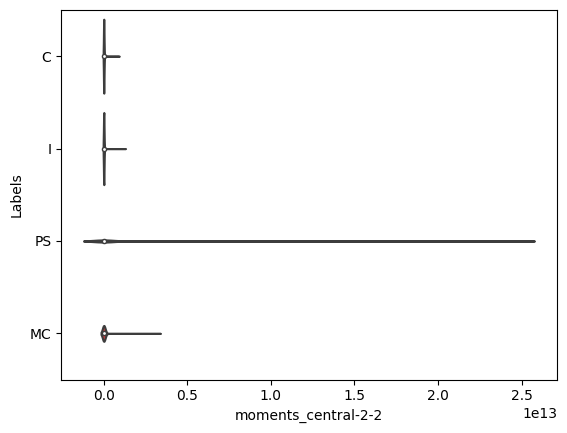

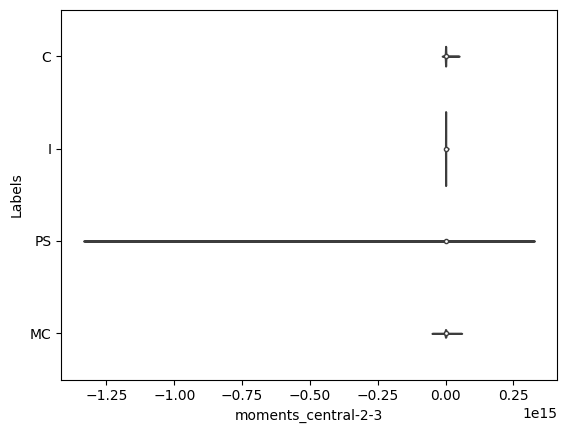

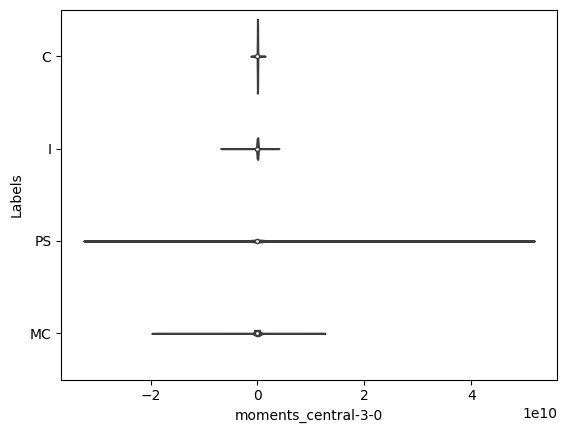

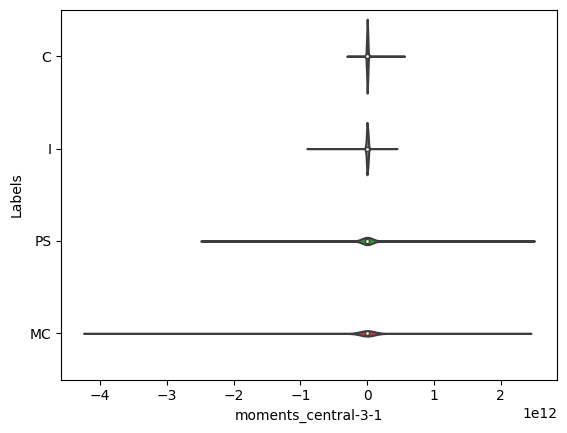

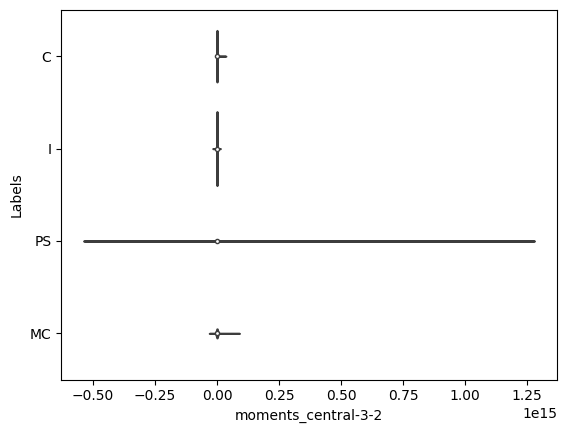

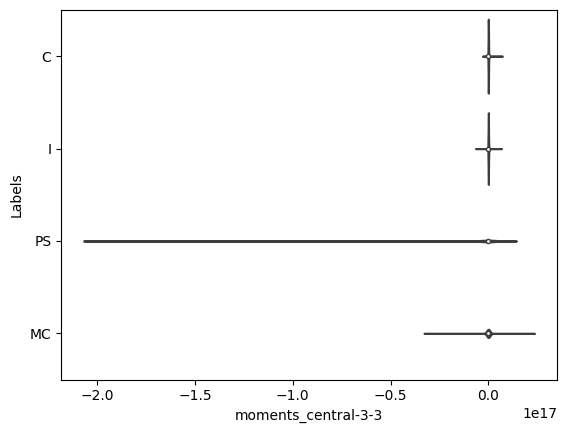

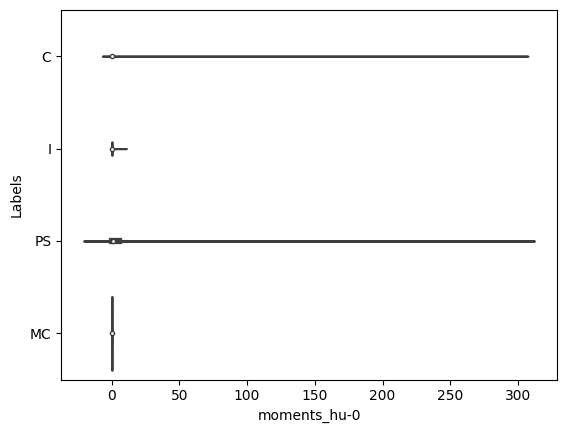

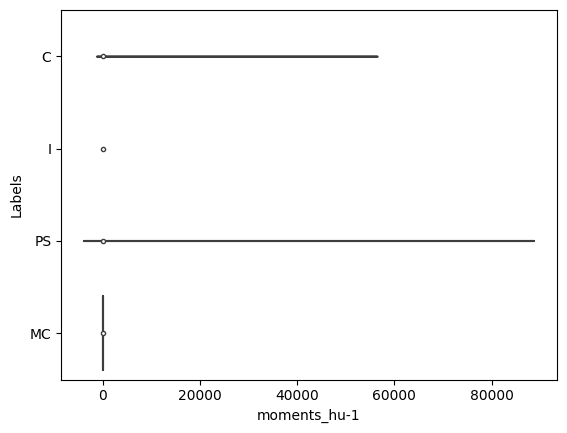

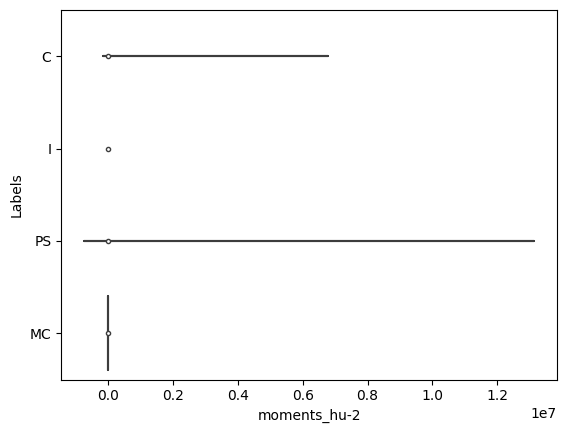

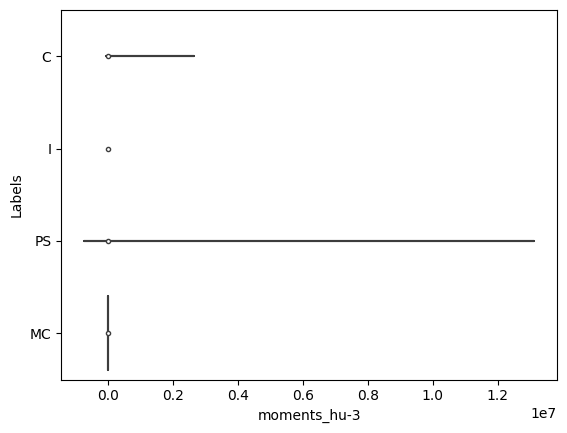

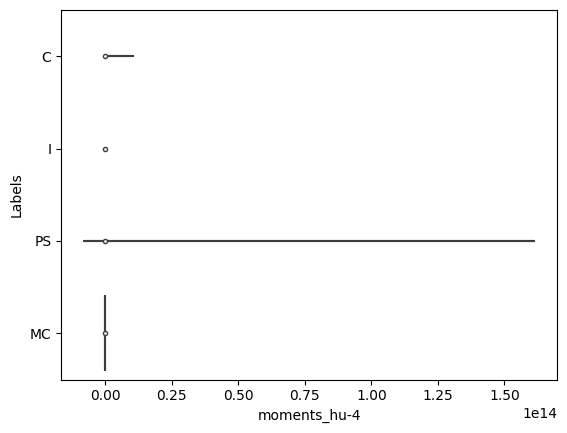

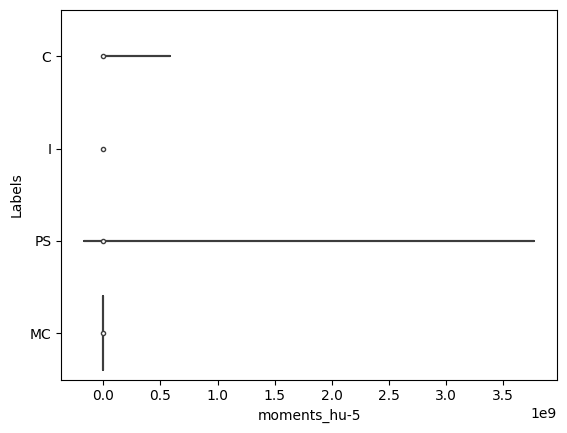

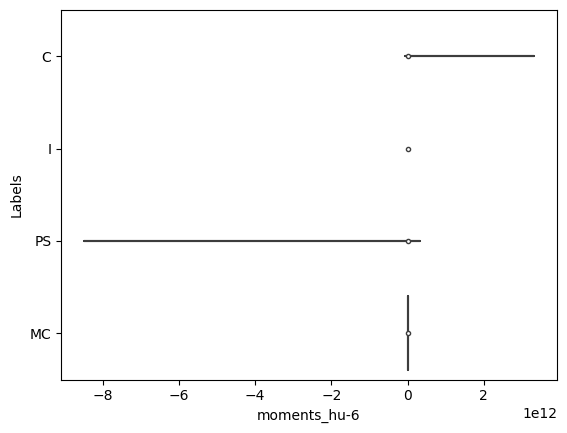

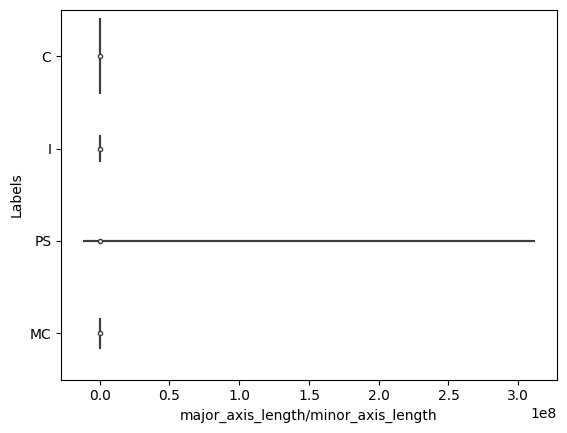

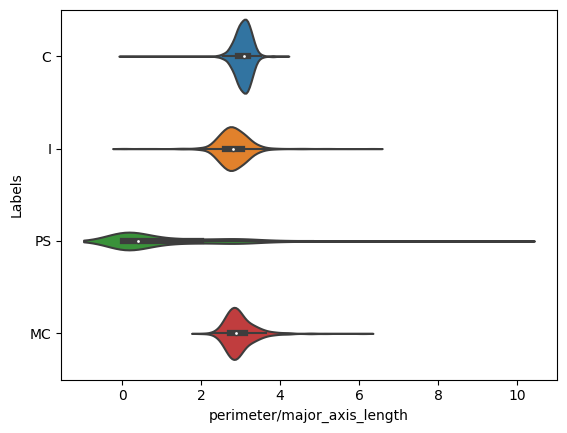

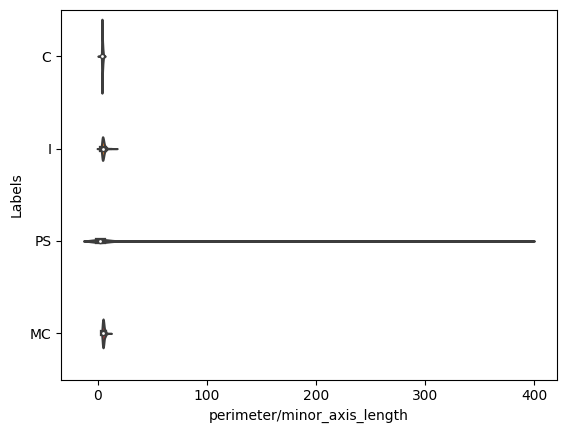

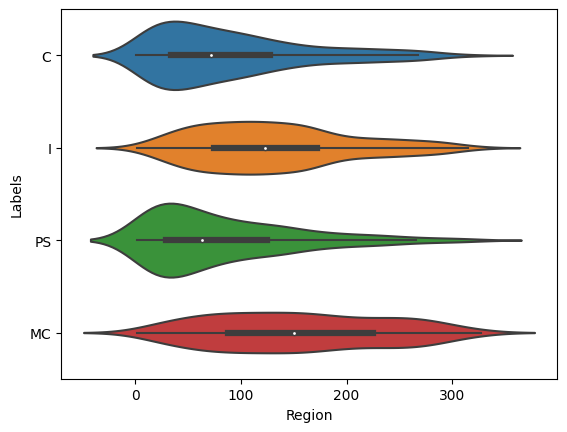

In [12]:
import seaborn as sns 

df.replace([np.inf, -np.inf,np.nan], 0, inplace=True)
#df.dropna(inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_sub = df[df.Labels.isin(["I","C","MC","PS"])]

for feature in df.columns:
    if feature in ["label","Labels","Filename"]:
        continue
    fig, ax = plt.subplots()
    sns.violinplot(df_sub,x=feature,y="Labels",ax=ax)


/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/531653525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["Labels","label","Region"],inplace=True)


B


/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/531653525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["Labels","label","Region"],inplace=True)


C


/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/531653525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["Labels","label","Region"],inplace=True)


I


/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/531653525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["Labels","label","Region"],inplace=True)


PS


/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/531653525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["Labels","label","Region"],inplace=True)


MC


/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/531653525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["Labels","label","Region"],inplace=True)


V


/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/531653525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["Labels","label","Region"],inplace=True)
/Users/jacobpietryga/anaconda3/envs/colloidal_crystal_env/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/jacobpietryga/anaconda3/envs/colloidal_crystal_env/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


PC


/var/folders/vk/znvr66h543g3tt_w4mwmsslh0000gn/T/ipykernel_46922/531653525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["Labels","label","Region"],inplace=True)


0


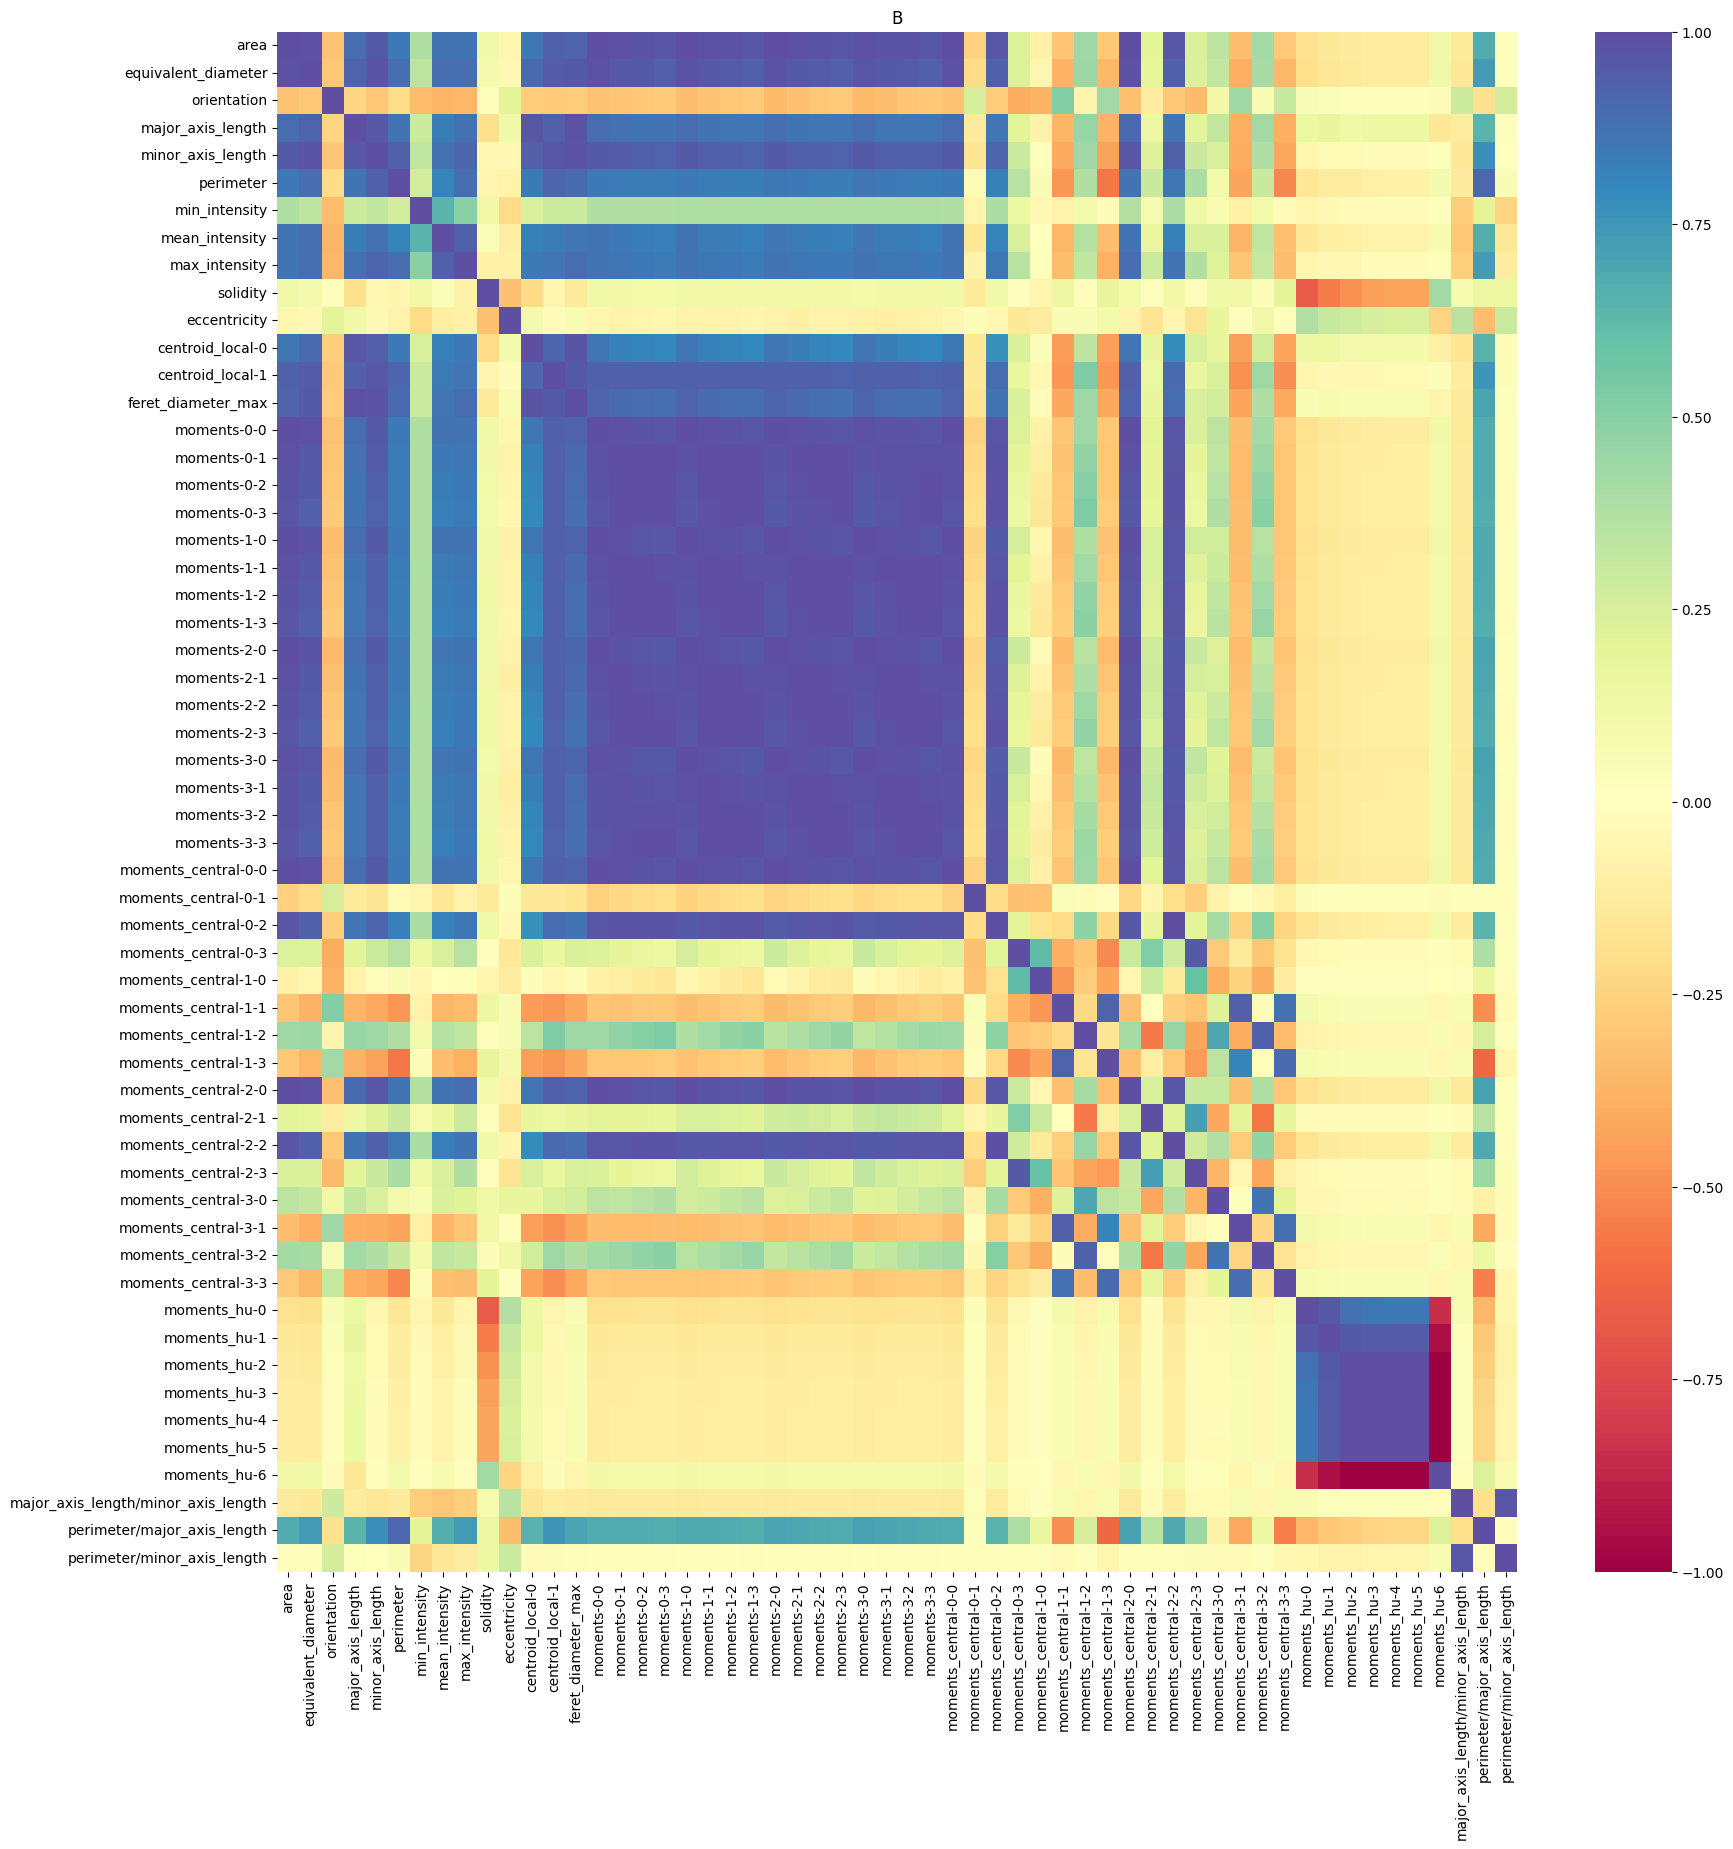

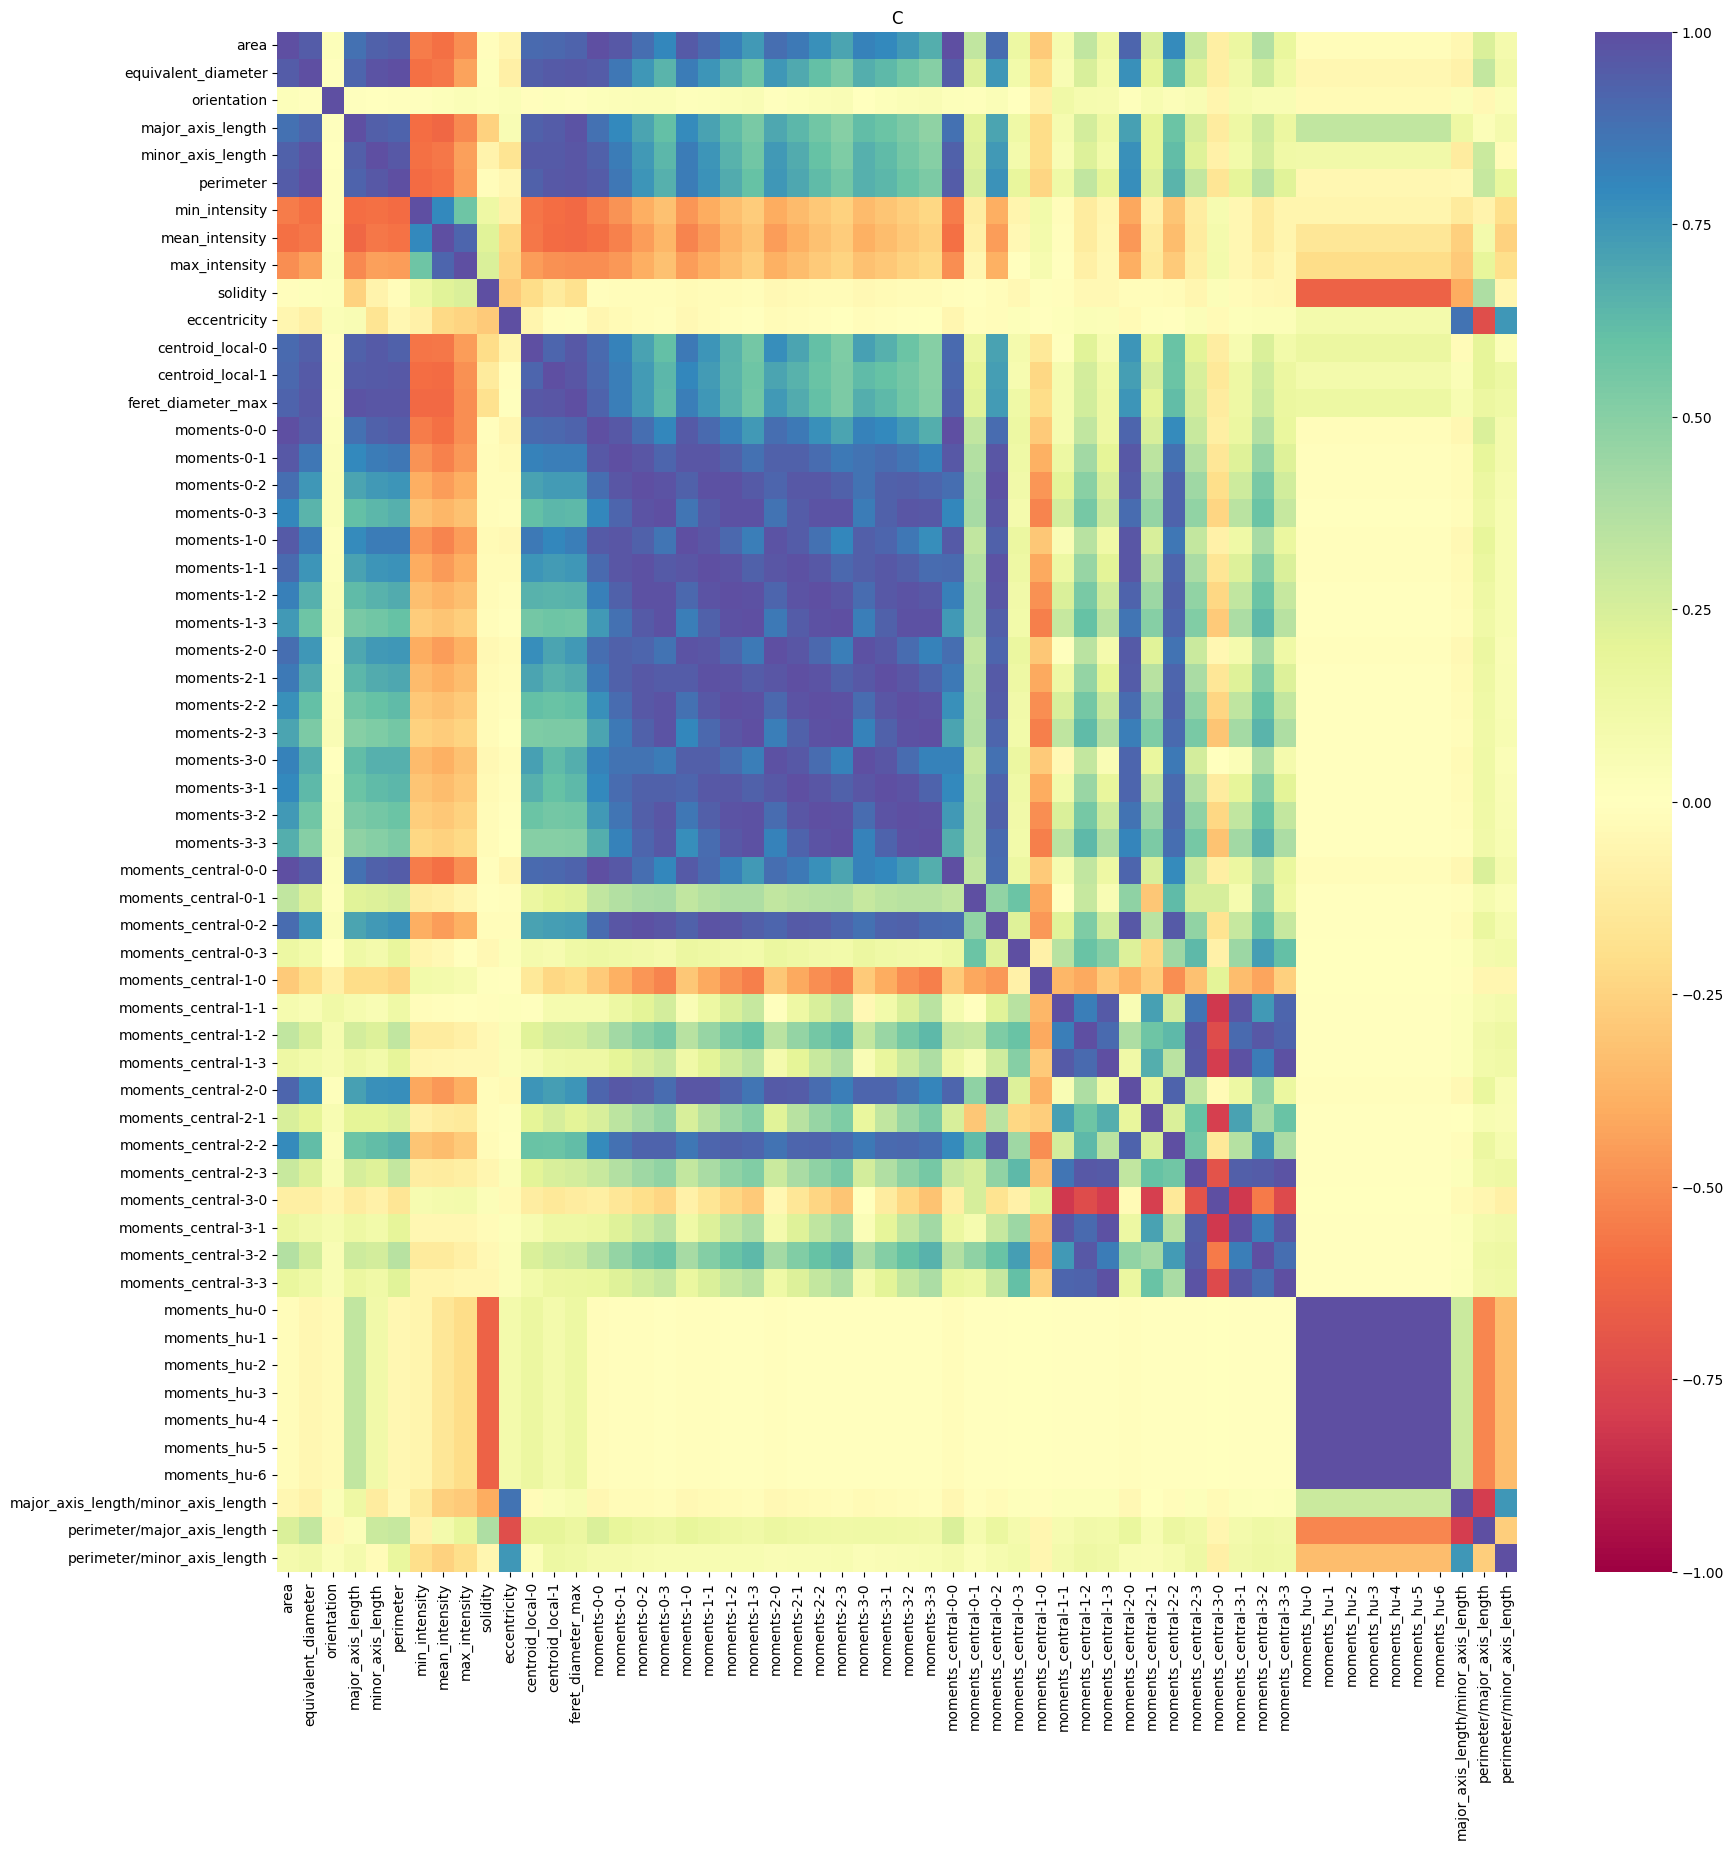

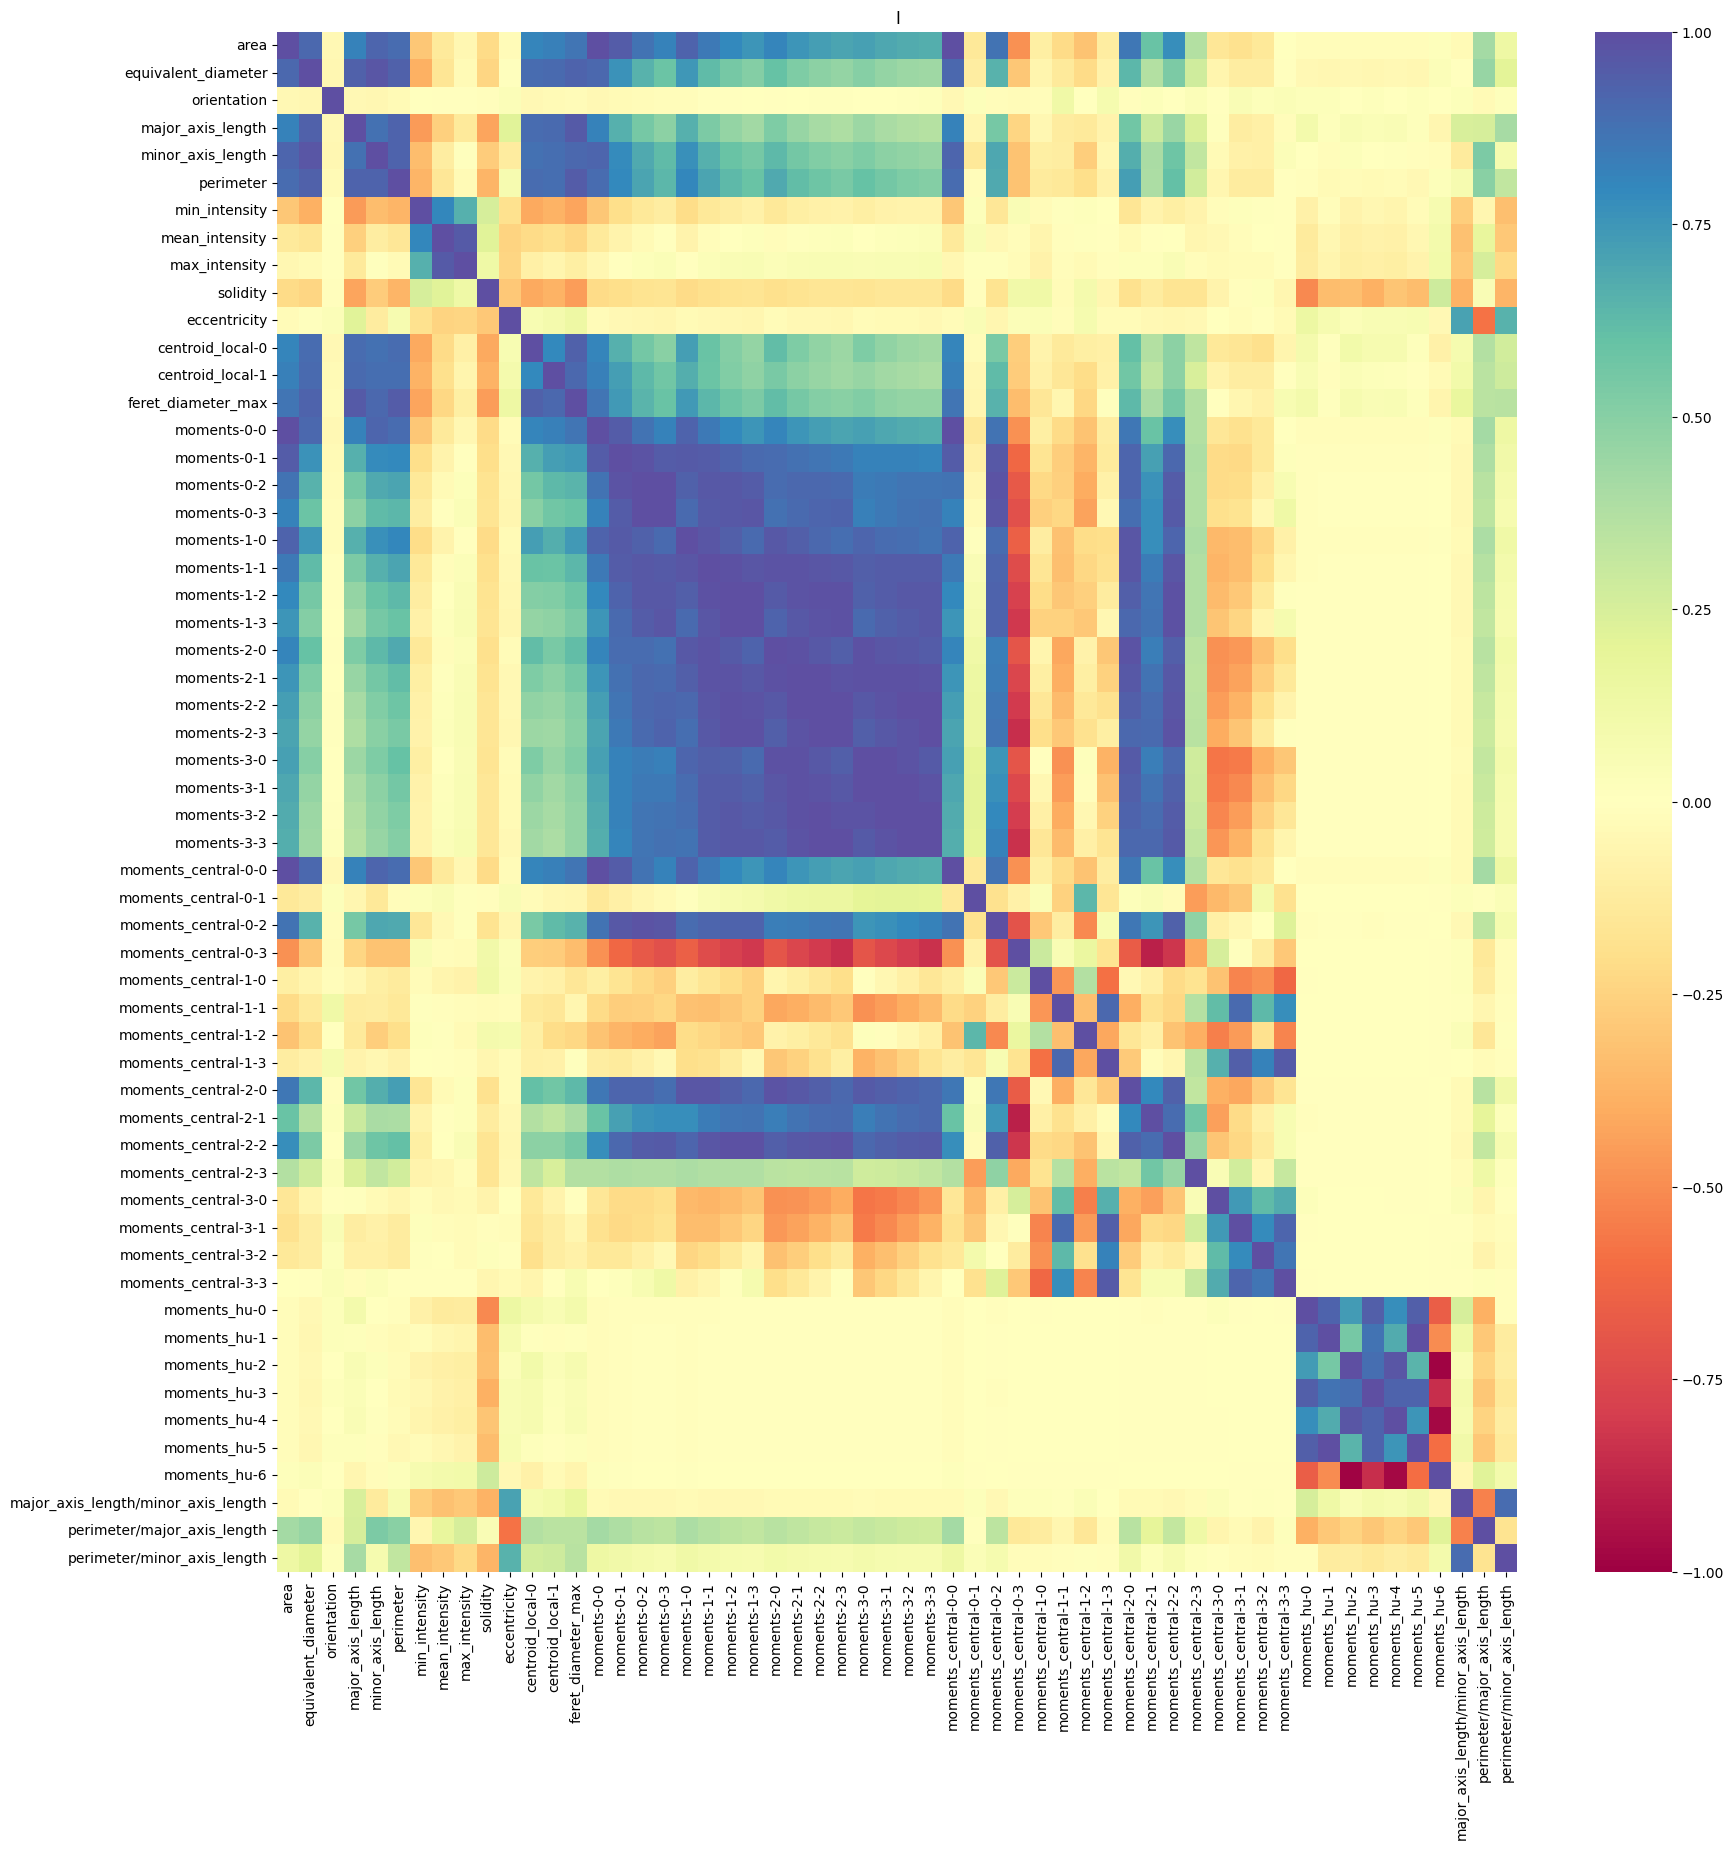

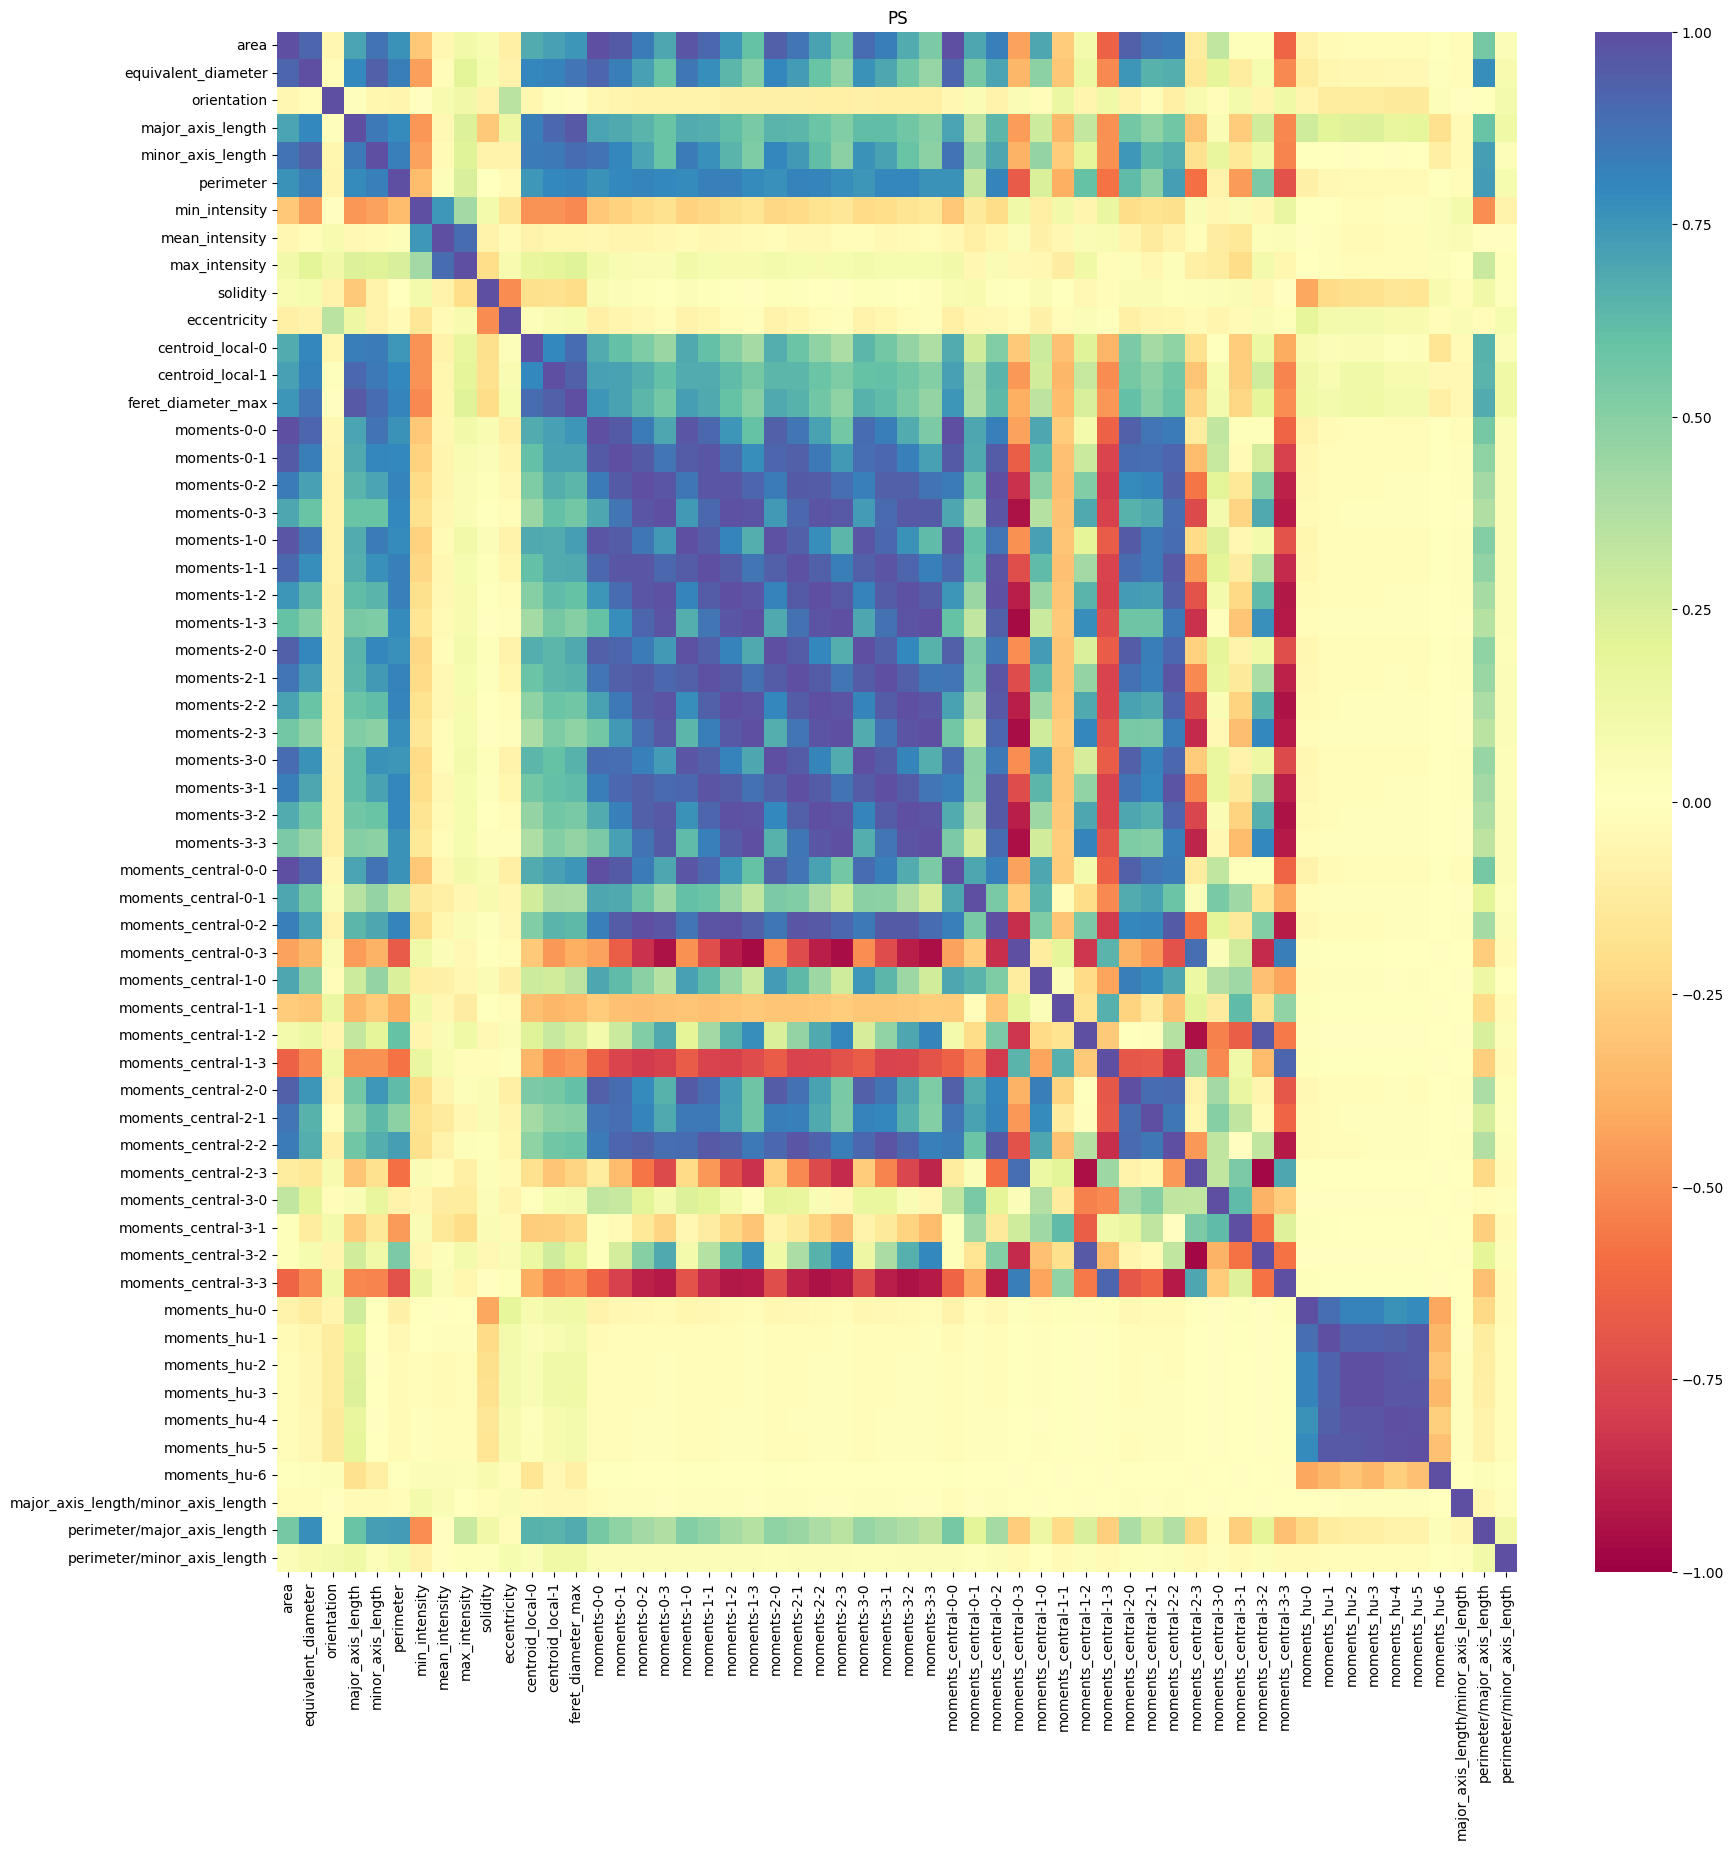

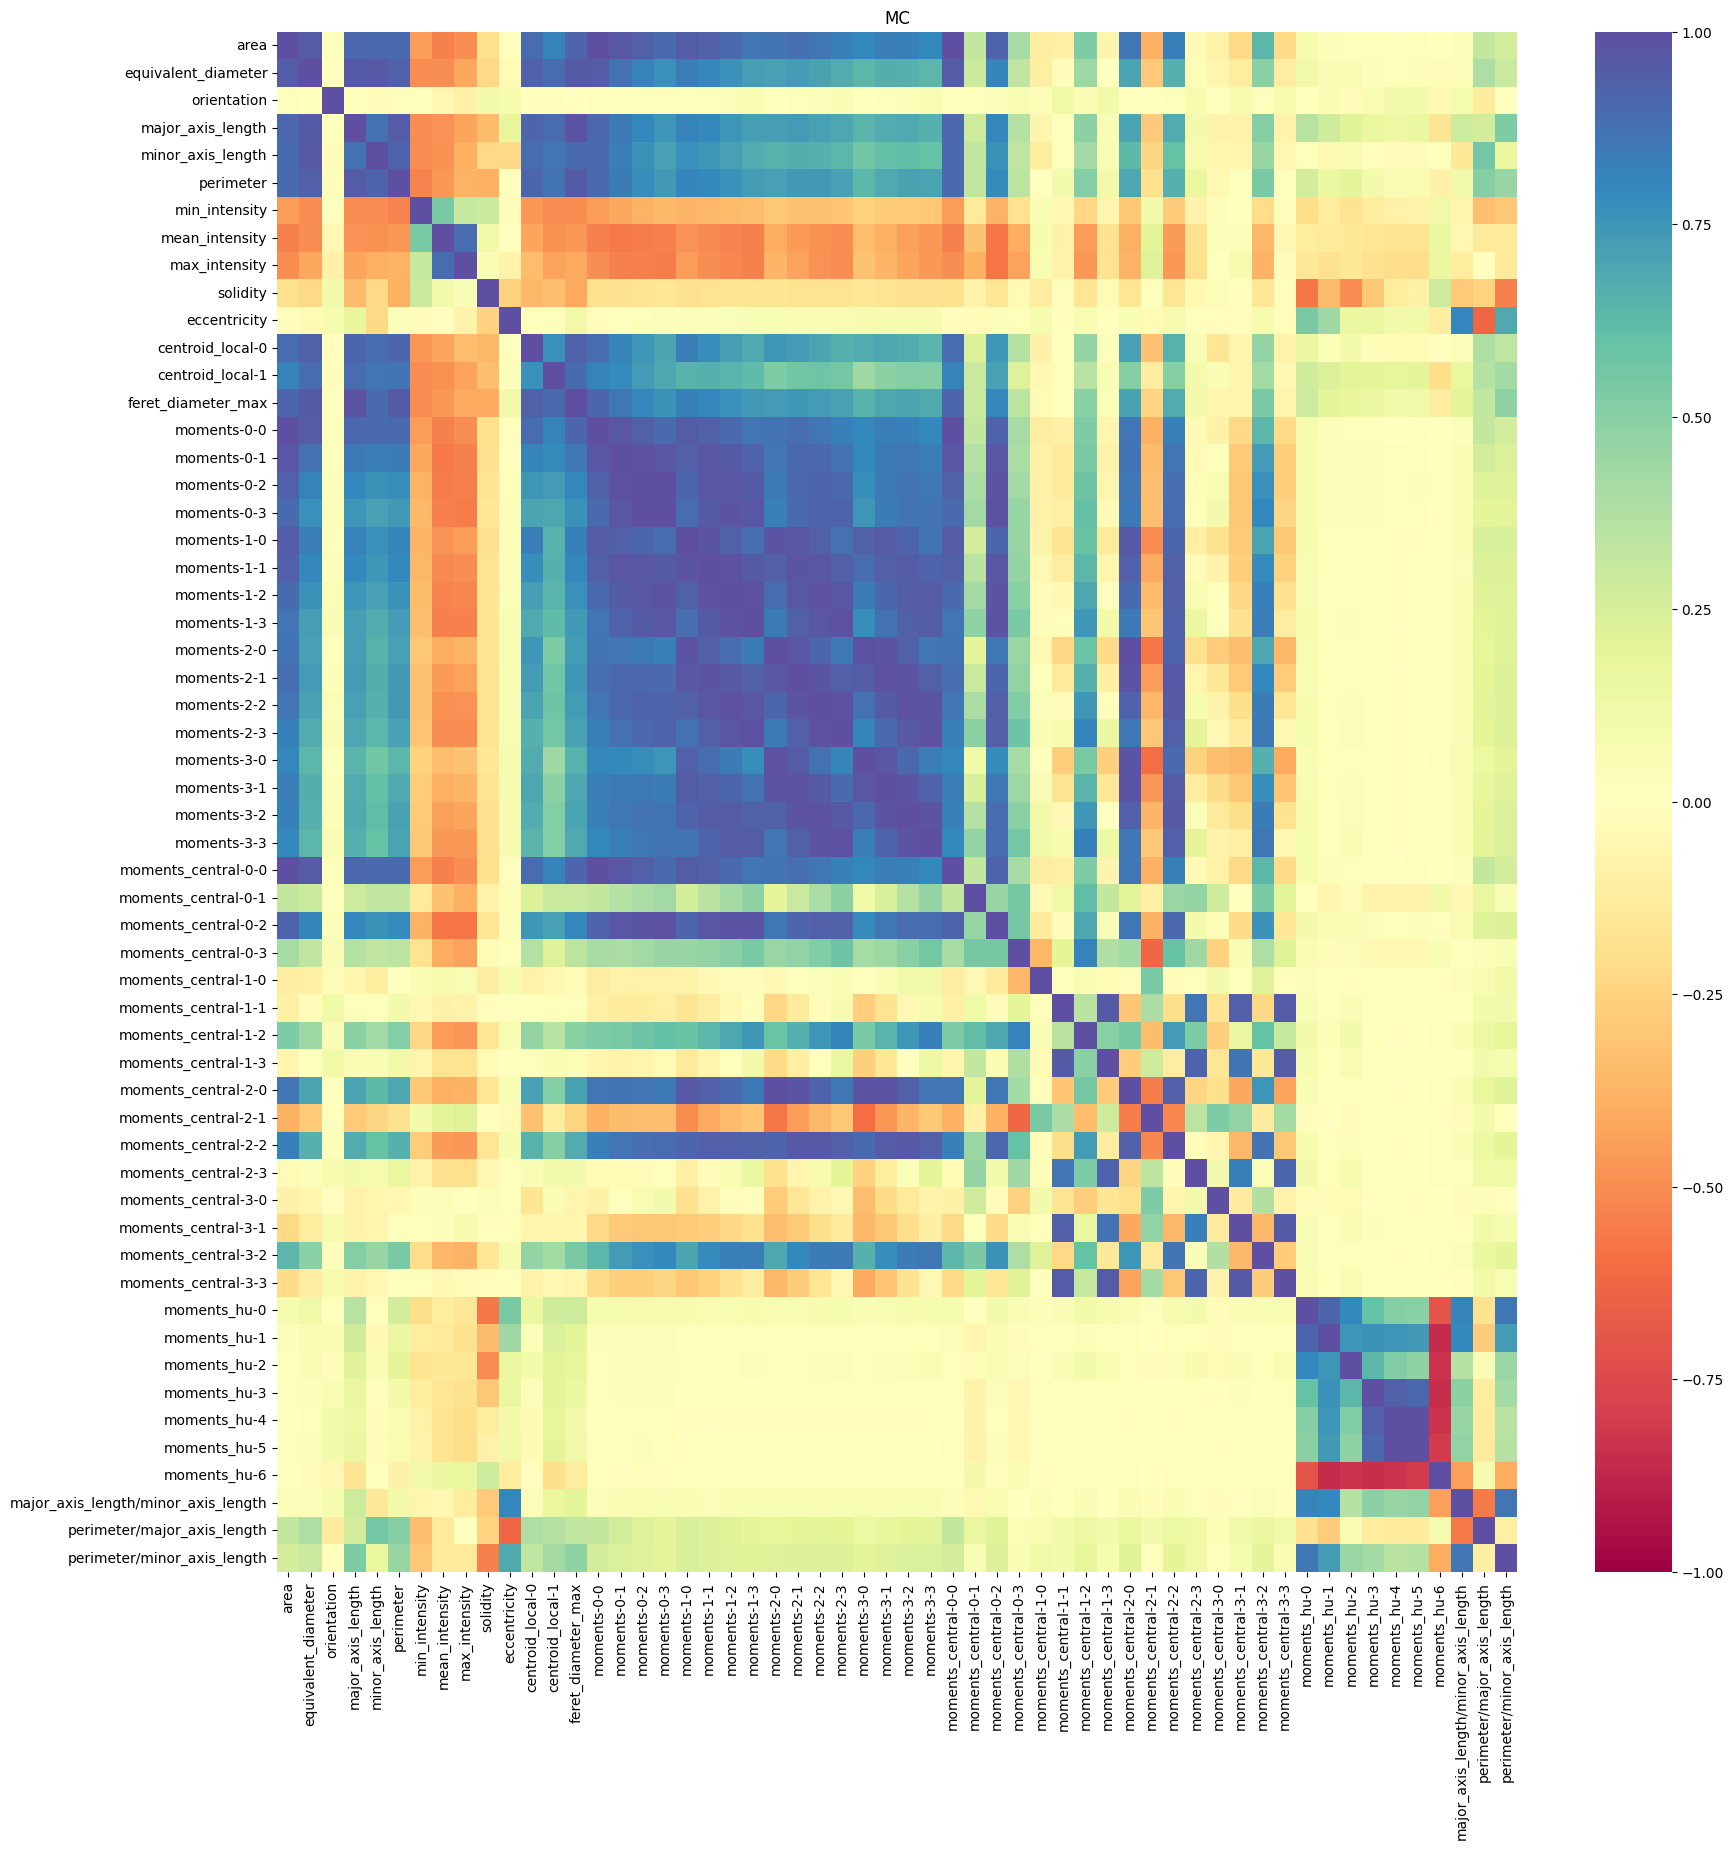

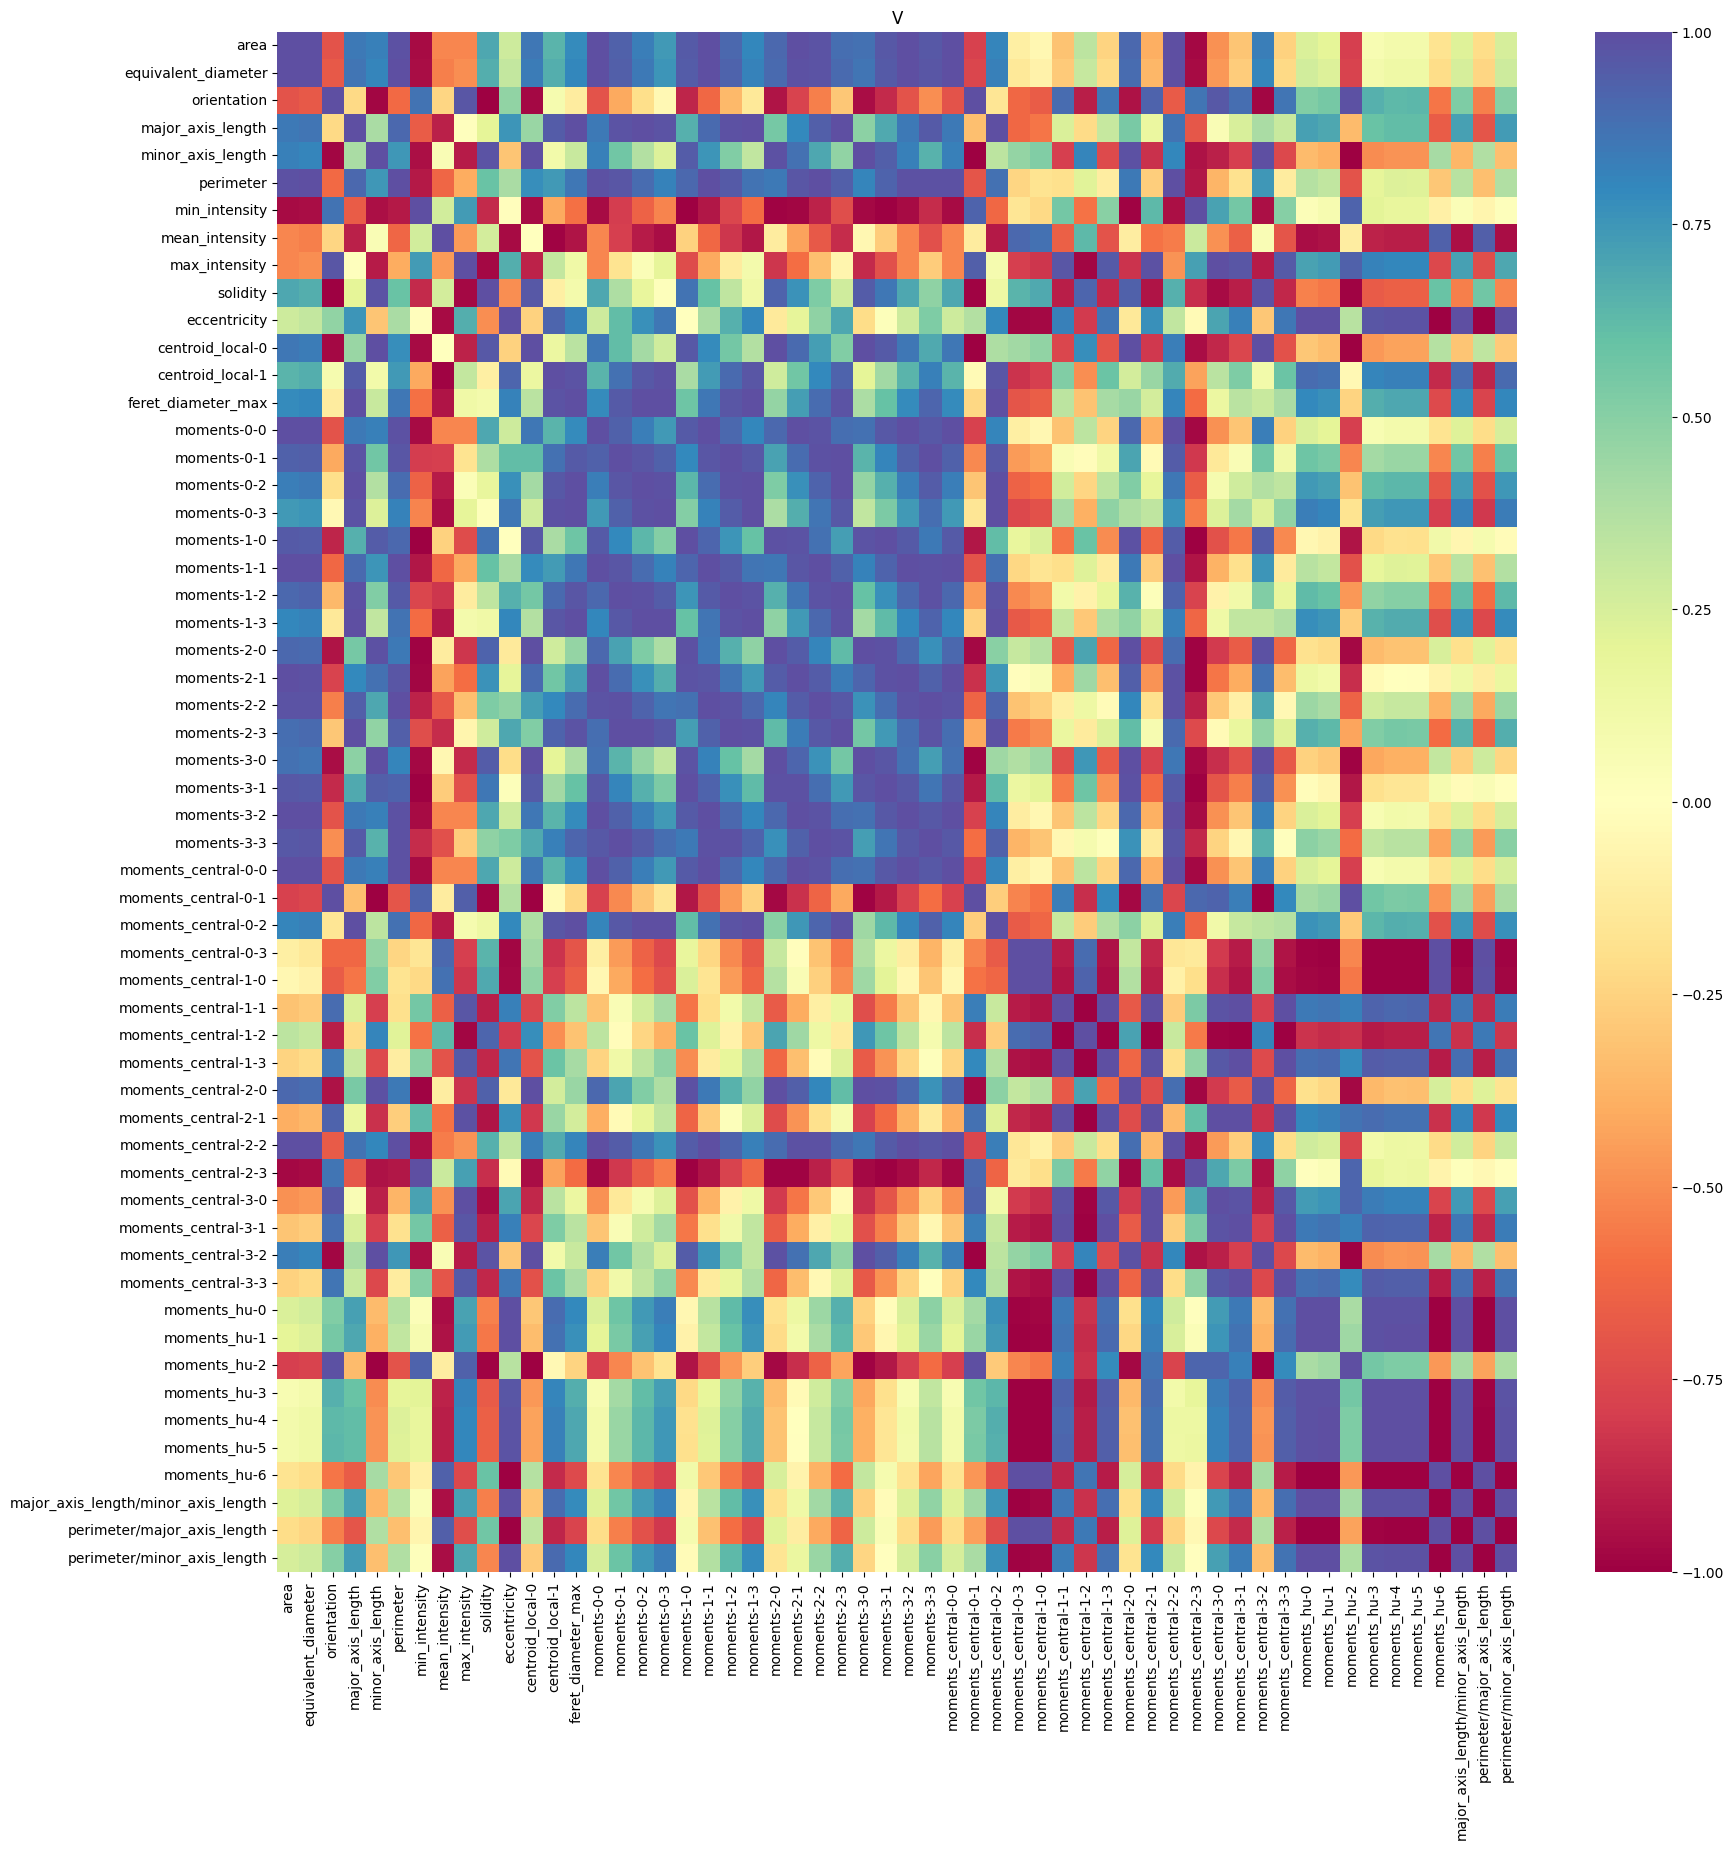

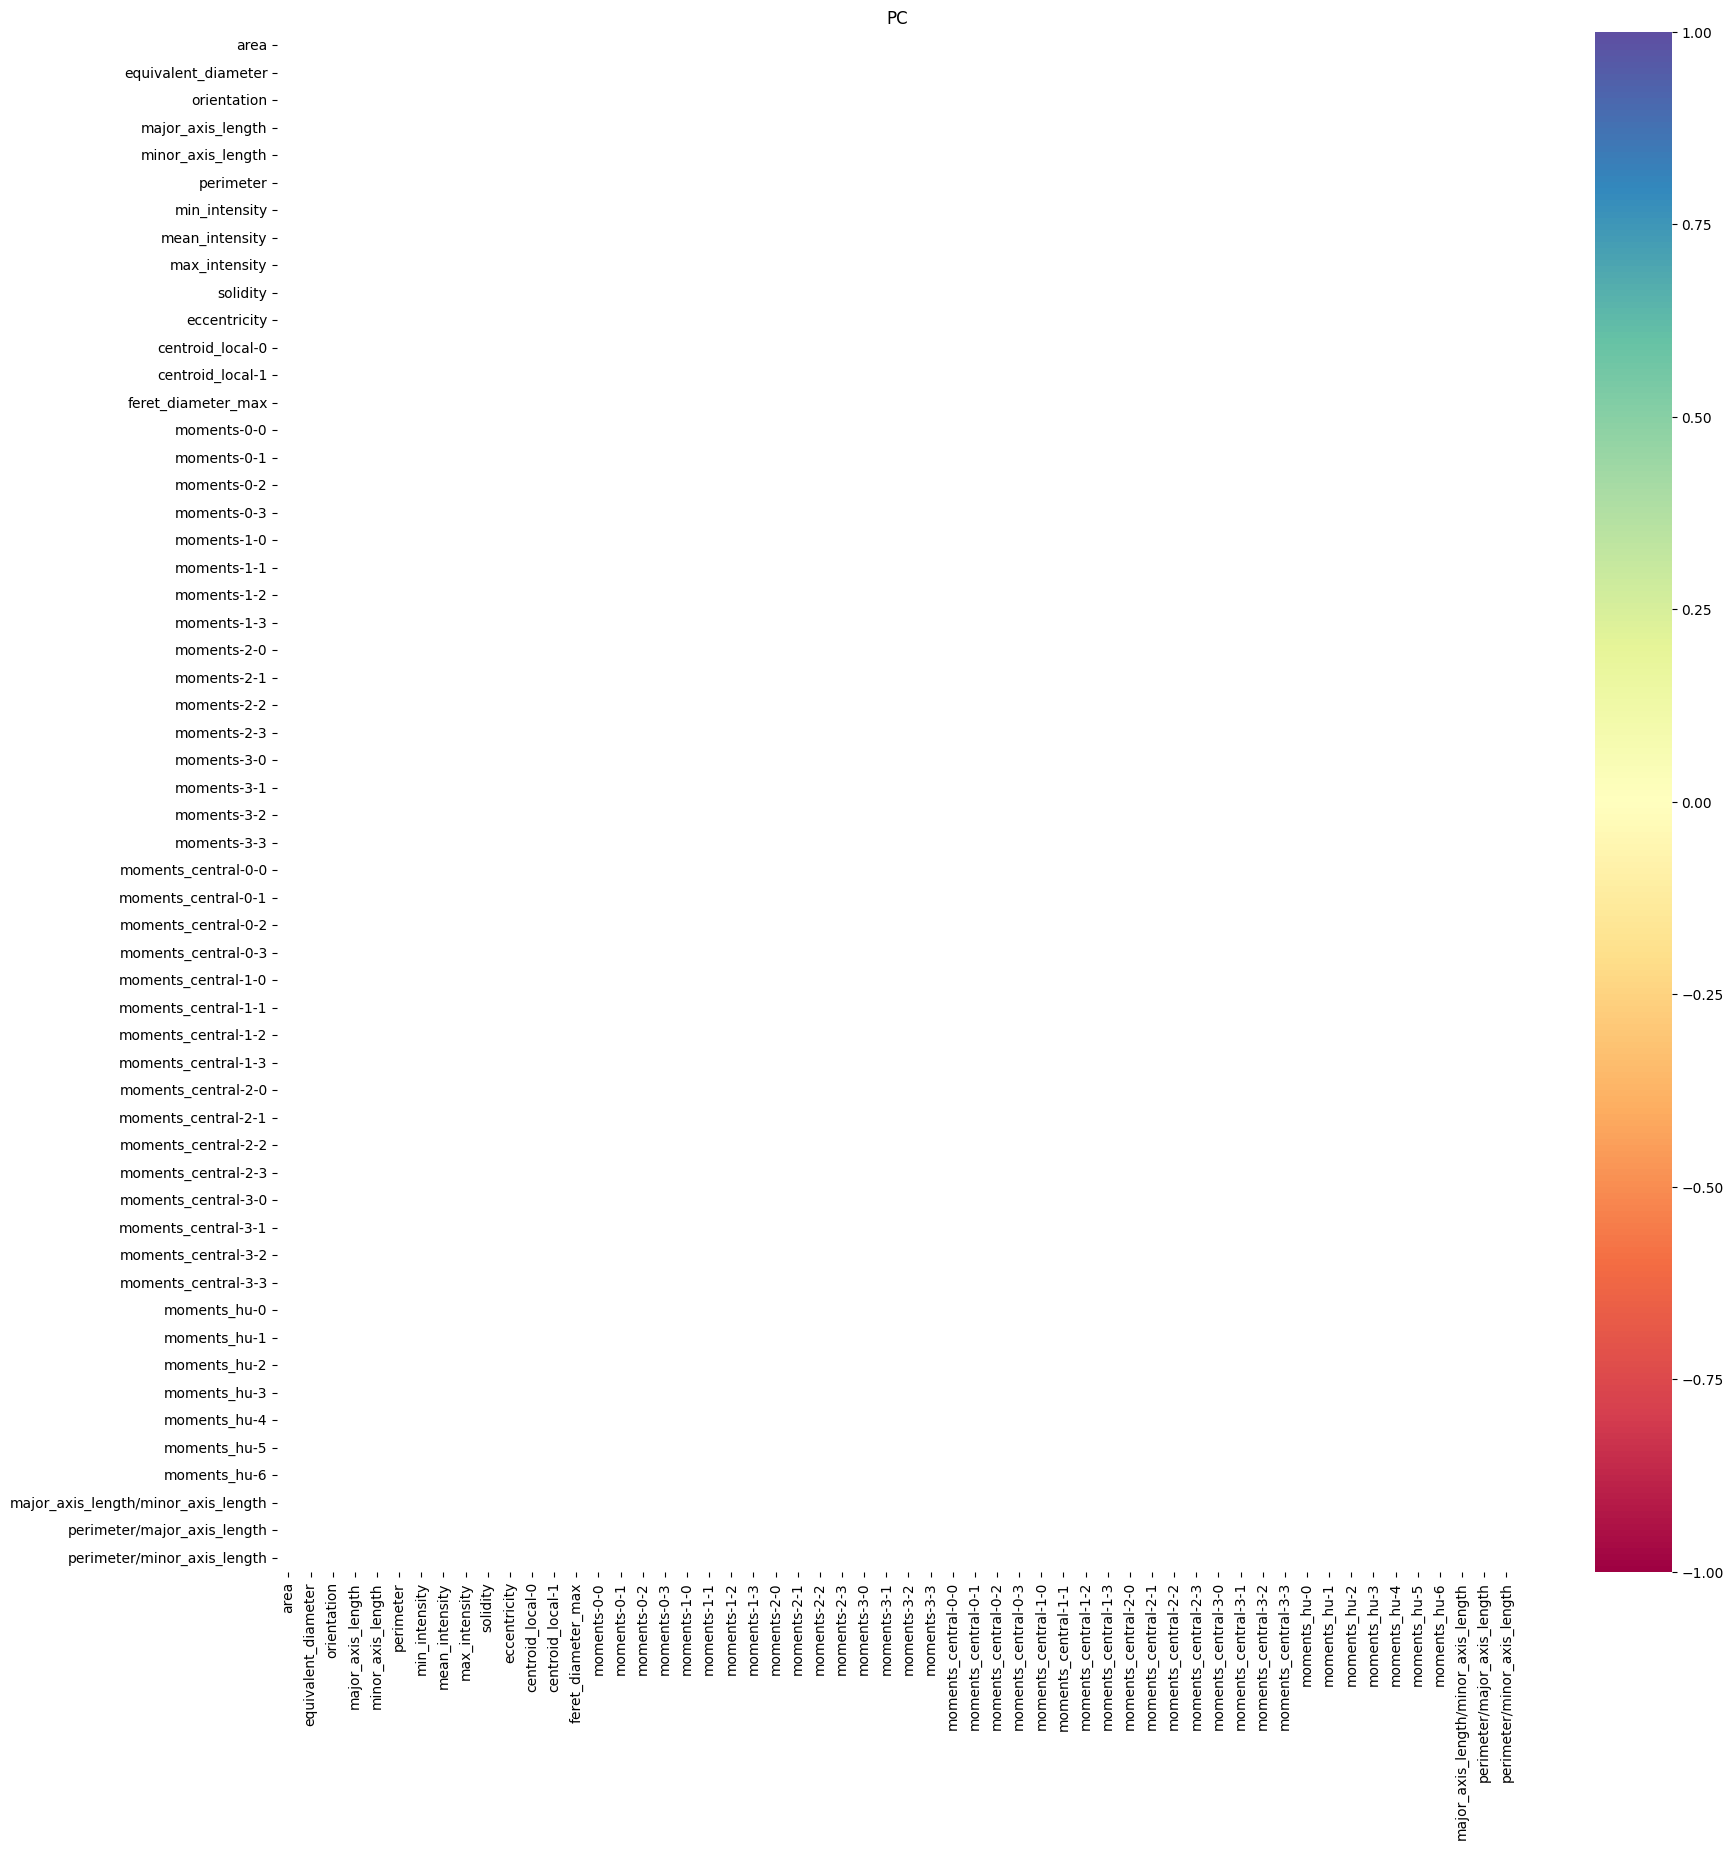

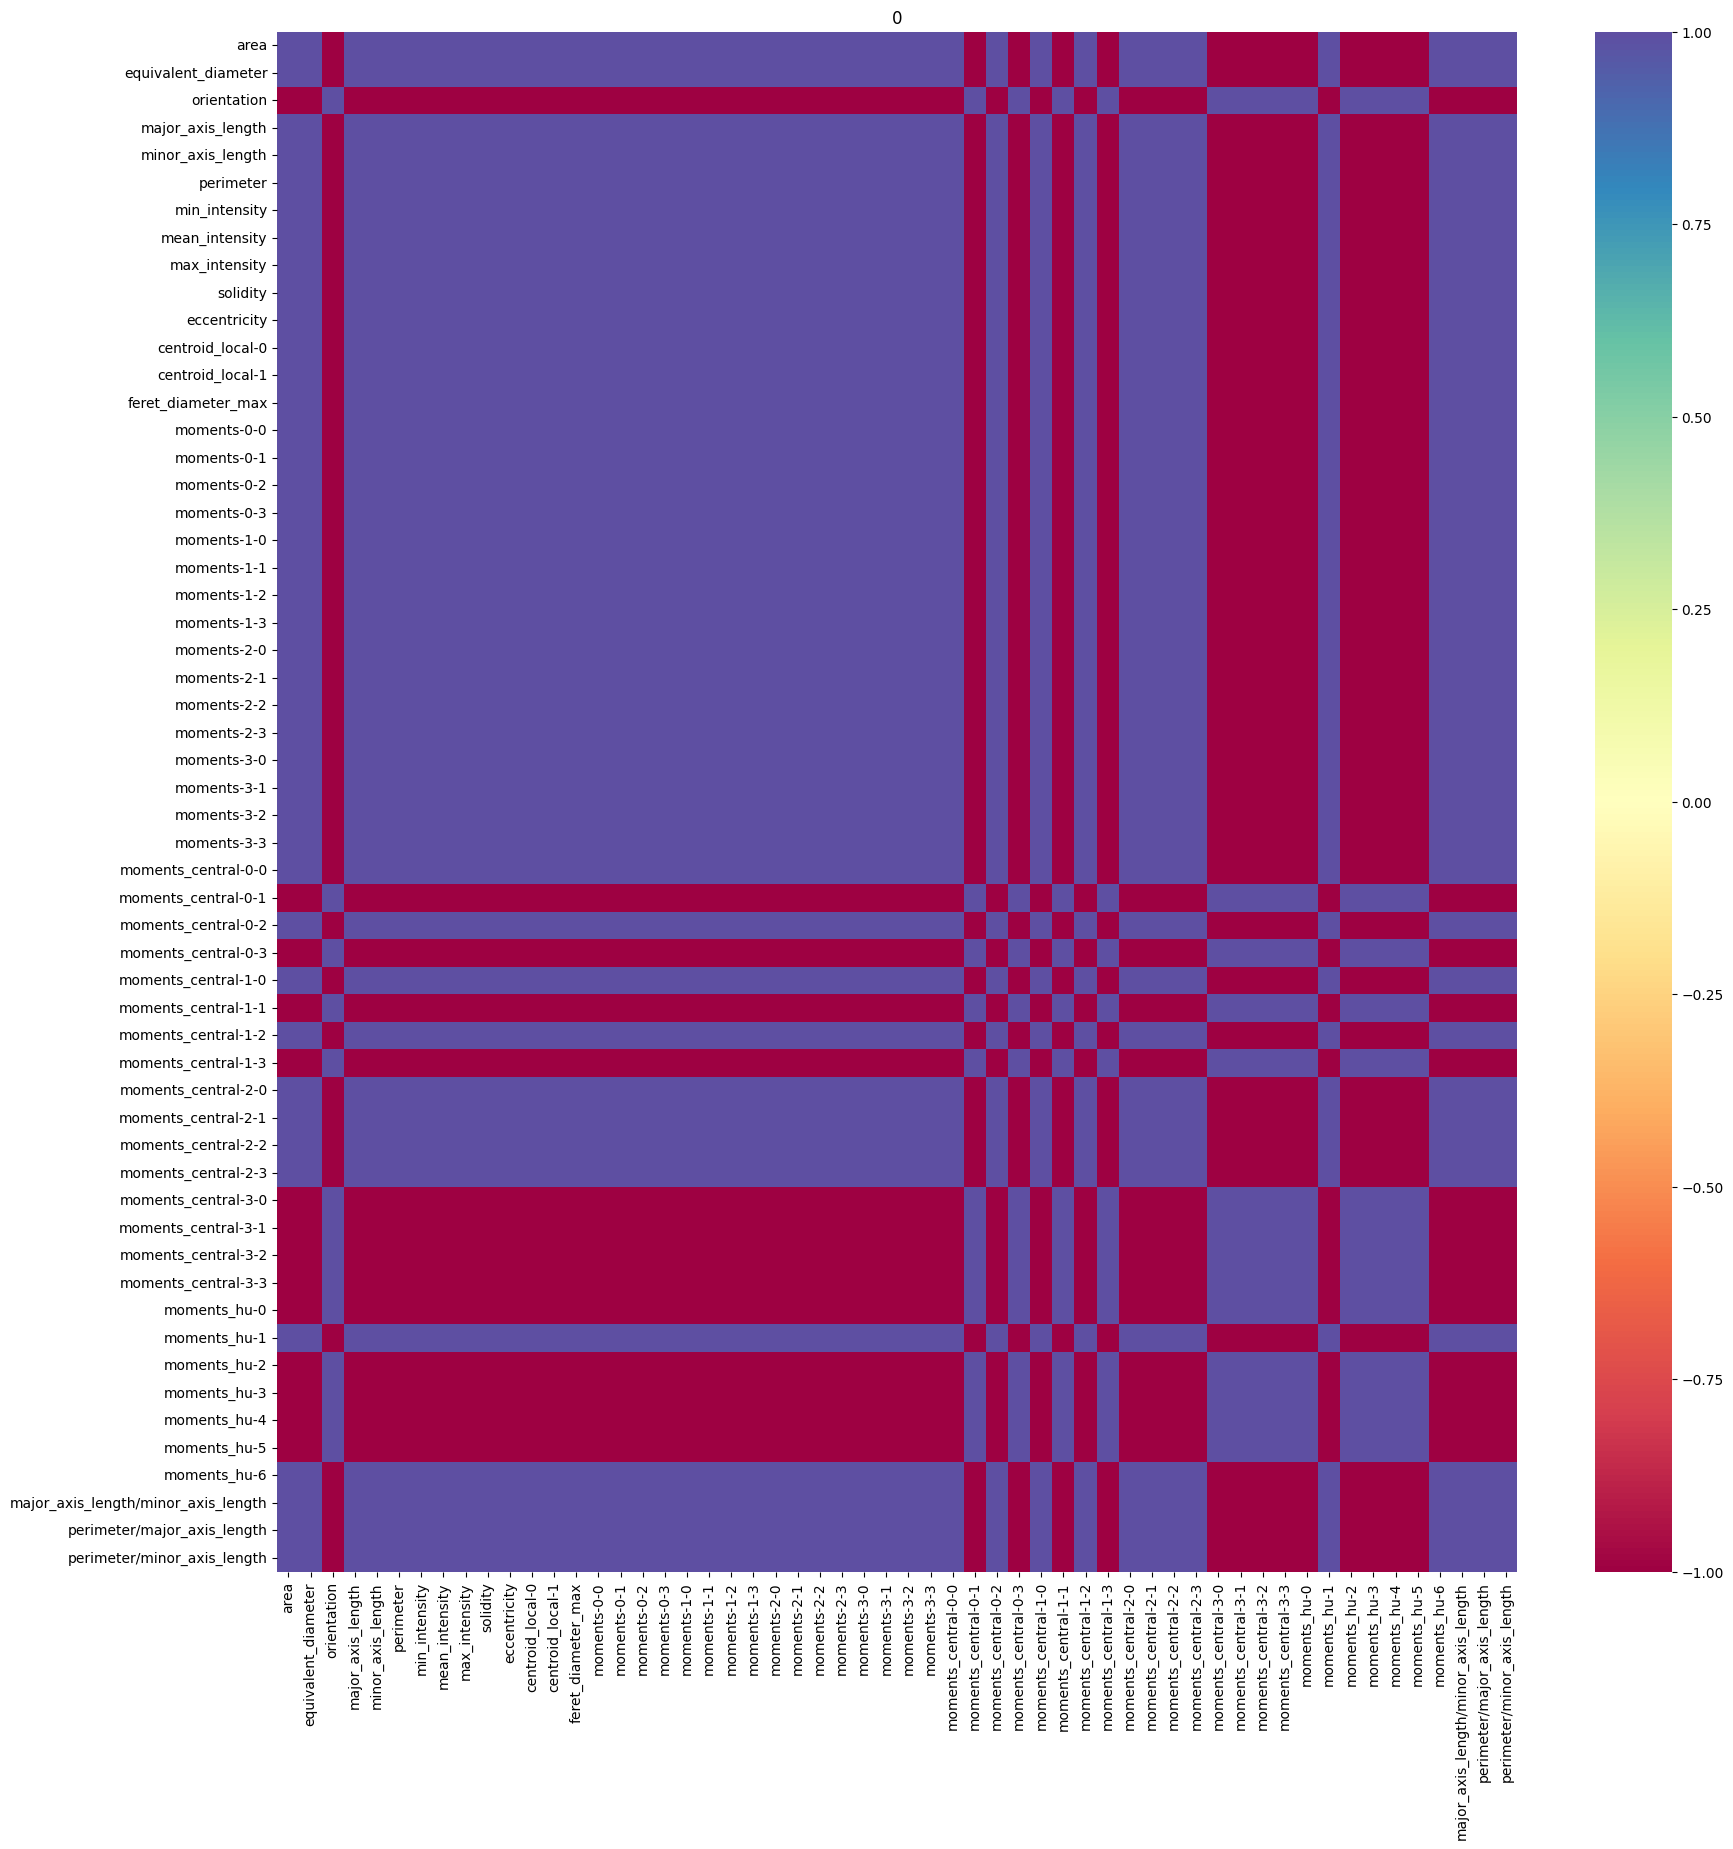

In [28]:
from heatmap import heatmap, corrplot

cmap = plt.get_cmap("Spectral")
norm = plt.Normalize(vmin=-1,vmax=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

for unique_label in df.Labels.unique():
    fig,ax = plt.subplots(figsize=(20,20))
    ax.set_title(f"{unique_label}")
    sub_df = df[df.Labels == unique_label]
    sub_df.drop(columns=["Labels","label","Region"],inplace=True)
    corr = sub_df.corr()
    #corrplot(corr,size_scale=200,marker='o')
    sns.heatmap(corr,ax=ax,cmap=cmap,norm=norm)
    print(unique_label)
    directory = Path("Bivariate_Heatmaps")
    path = directory / f"{unique_label}.png"
    os.makedirs(directory,exist_ok=True)
    plt.savefig(path,)
    
#sub_df = C_df
#corrplot(C_df.corr(),size_scale=200,marker='o')